In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simple Linear Regression (1 independent variable + 1 target variable)

## Experiment with Original Data

### Load Data

In [2]:
# load package for loading data
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Mounted at /content/drive


In [3]:
housing_dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/boston_housing.csv")
housing_dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### Train-Test Set Spliting

Requirement:
* Use the average number of rooms (RM) to estimate the house price (MEDV)
* Split training, testing set with ratio 7:3 and random state = 42

In [4]:
X = housing_dataset.loc[:, ['RM']].to_numpy()
y = housing_dataset.loc[:, 'MEDV'].to_numpy()

In [5]:
# load package for spliting data
import sklearn
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Data Visualization

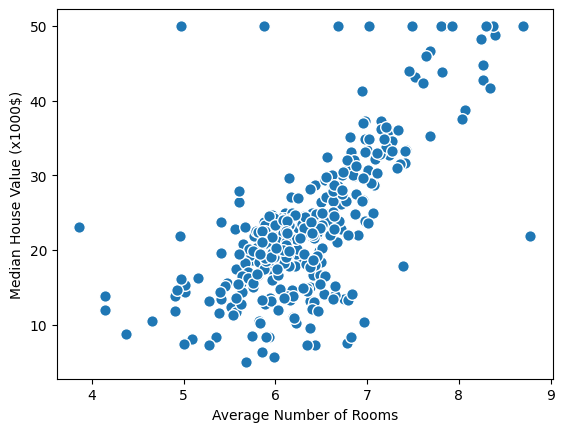

In [7]:
# visualize data
# xlabel: 'Average Number of Rooms'; ylabel: 'Median House Value (x1000$)'
plt.scatter(X_train, y_train, facecolor='tab:blue', edgecolor='white', s=70)
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.show()

### Linear Regression (Base)

In [8]:
def makePredictions(w: np.array, b: np.array, X: np.array) -> np.array: ### ???
  """
  - This is a function that predict output-variable for input-array of X
  - inputs:
    - w: np.array-(n_features)
    - b: np.array-(1)
    - X: np.array-(n_samples, n_features)
  - return:
    - y: np.array, shape (n_samples)
  """
  return np.sum(X * w + b, axis = 1)

### Gradient Descent

In [9]:
# main source code for all
class LinearRegressionScratch: ### ***
  """
  This is class of Linear Regression Model
  inputs:
  - n_features: number of features of input-variables
  - random_state: establish consistency in all execute the program
  - learning_rate: learning rate of Gradient Descent Algorithm
  - n_epochs: number of iterations over all samples
  - batch_size: number of samples in each batch
  - pow_strength: doubling the examples
  """
  def __init__(self, n_features: int, random_state: int= 42, learning_rate: np.array= 1e-3, n_epochs: int= 200, batch_size: float= -1, pow_strength: int= 0) -> None:
    self.random_state = random_state
    np.random.seed(self.random_state)
    self.n_features = n_features

    # init w randomly with n+1 features
    self.w = np.random.rand(self.n_features + 1)

    # set learning HP
    self.learning_rate = learning_rate
    self.n_epochs = n_epochs
    self.batch_size = batch_size
    self.pow_strength = pow_strength

    # costs and params
    self.costs = []
    self.inlearn_params = []


  def expandInputVariables(self, __X: np.array):
    """
    This is method that expand shape of X to (len(X), n_features + 1)
    inputs:
      - X: samples, type: np.array, constant
    """
    # change X
    X = __X.copy()
    if(X.shape[1] != self.n_features + 1):
      o = np.ones((len(X), 1))
      return np.concatenate((o, X), axis = 1)
    return X


  def predict(self, __X: np.array) -> np.array:
    """
    This is method that predict the outputs for samples X
    inputs:
      - X: samples, type: np.array-(len(X), n_features+1), constant
    return:
      - predictions for X, type: np.array-(len(X))
    """
    # change X
    X = __X.copy()
    # shape X
    if(len(X.shape) < 2):
      X.reshape(1, -1)
    X = self.expandInputVariables(X)
    return np.sum(X * self.w, axis = 1)


  def compute_gradient(self, __X: np.array, __y: np.array) -> np.array:
    """
    This is method that compute gradient for w
    """
    # change X, y
    X, y = __X.copy(), __y.copy()
    # shape X
    if(len(X.shape) < 2):
      X.reshape(1, -1)
    y_pred = self.predict(X)
    return 2 * np.mean(X * (y_pred - y).reshape((-1, 1)), axis = 0)


  def compute_cost(self, __X: np.array, __y: np.array, index: int = -1) -> np.array:
    """
    This is method that compute cost for w with dataset = (X, y)
    inputs:
      - X: samples, type: np.array-(len(X), n_features+1), constant
      - y: output-variable, type: np.array-(len(X))
    return:
      - cost of w, type: np.array-(1)
    """
    # change X, y
    X, y = __X.copy(), __y.copy()
    X = self.expandInputVariables(X)
    y_pred = self.predict(X)
    return np.mean((y_pred - y)**2)

  def initParam(self, X, y):
    self.w = np.zeros(self.n_features + 1)
    self.w[0] = np.mean(y) ### *** ensure that R2 >= 0
    for i in range(1, X.shape[1]):
      x = X[:, i].reshape(len(X))
      if(self.n_features == 1):
        self.w[i] = np.sum((y - np.mean(y))*(x - np.mean(x))) / np.sum((x - np.mean(x))**2)
      else:
        self.w[i] = (np.mean(y)/np.mean(x)) / (np.max(y)/np.min(x)) * self.learning_rate

  def fit(self, __X: np.array, __y: np.array) -> None:
    """
    This is a method that learn from dataset (X, y)
    inputs:
      - X: samples, type: np.array-(len(X), n_features + 1), constant
      - y: output-variable, type: np.array-(len(X)), constant
    outcome:
      - model was fited
    """
    np.random.seed(self.random_state)
    # change X, y
    X, y = __X.copy(), __y.copy()
    ### randomly permutation
    ## X = np.random.permutation(X)
    X = self.expandInputVariables(X)
    for k in range(self.pow_strength):
      X = np.concatenate((X, X))
      y = np.concatenate((y, y))

    # init w0
    self.initParam(X, y)
    print("---------------------------------------")
    print('"LINEAR SCRATCH MODEL"')
    print('"W0" for learning is: ', self.w)
    print('"LEARNING RATE" is: ', self.learning_rate)

    # batch size
    if(self.batch_size <= 0):
      self.batch_size = int(len(X) * -self.batch_size)

    self.costs = []
    self.inlearn_params = []
    for i_epochs in range(self.n_epochs):
      # stochastic
      for i in range(0, len(X), self.batch_size):
        if(i_epochs == 0 and (i > 0.99 * len(X) or i < 0.01 * len(X))):
          print("learning at epoch = 0, i = ", i)
        # compute velocity
        velocity = self.compute_gradient(X[i: i+self.batch_size], y[i: i+self.batch_size])
        # update w'
        self.w -= self.learning_rate * velocity
      # compute loss at w
      self.costs += [self.compute_cost(X, y)]
      self.inlearn_params += [self.w]

    # pick param that have min cost
    self.w = self.inlearn_params[np.argmin(self.costs)]

- Requirement: Experiment with
-- Different learning rate values: eta = {1e-2, 1e-3, 1e-4}
-- Maximum number of iterations = 200
-- Random state = 42
- What is the suitable 'learning rate' value?

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [23.01581921  9.1181022 ]
"LEARNING RATE" is:  0.01
learning at epoch = 0, i =  0
---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [23.01581921  9.1181022 ]
"LEARNING RATE" is:  0.001
learning at epoch = 0, i =  0
---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [23.01581921  9.1181022 ]
"LEARNING RATE" is:  0.0001
learning at epoch = 0, i =  0


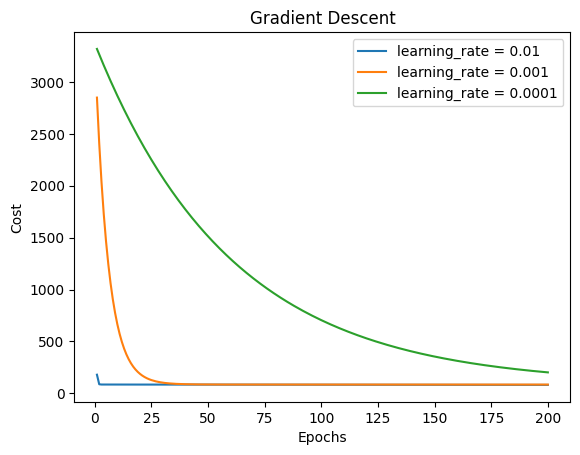

In [10]:
for learning_rate in [1e-2, 1e-3, 1e-4]:
  # Initialize the model
  reg_GD = LinearRegressionScratch(n_features= X_train.shape[1], random_state= 42,
                                  learning_rate= learning_rate, n_epochs= 200, batch_size= -1, pow_strength= 0)

  # Train model
  reg_GD.fit(X_train, y_train)

  # Visualize the cost trend
  plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs, label = f'learning_rate = {learning_rate}')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.legend()
plt.show()

- Respond:
  - The suitable 'learning rate' value is ***1e-2***, because it is the largest and converges.

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [23.01581921  9.1181022 ]
"LEARNING RATE" is:  0.01
learning at epoch = 0, i =  0


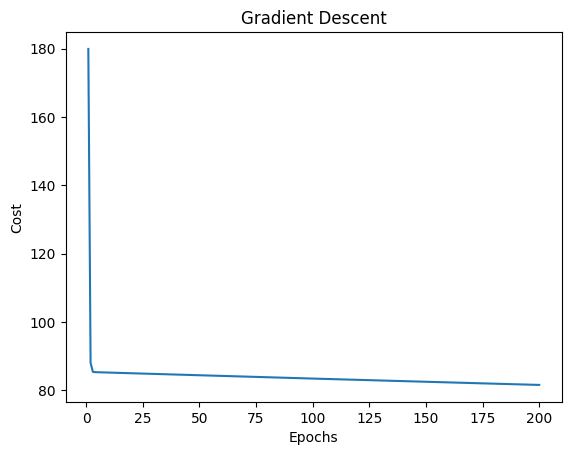

In [11]:
# Initialize the model
reg_GD = LinearRegressionScratch(n_features= X_train.shape[1], random_state= 42,
                                learning_rate= 1e-2, n_epochs= 200, batch_size= -1, pow_strength= 0)

# Train model
reg_GD.fit(X_train, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

Visualize the prediction of Gradient Descent model on Training Data

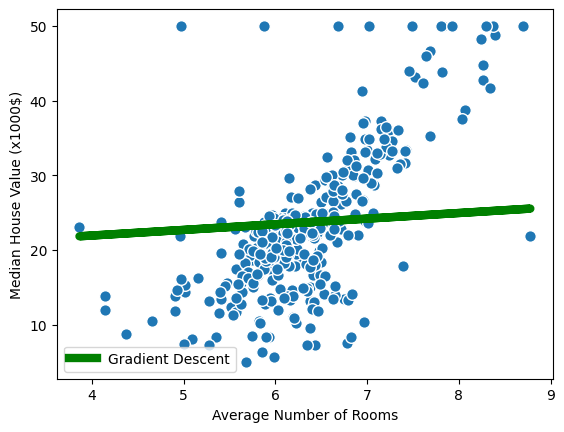

In [12]:
plt.scatter(X_train, y_train, facecolor='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_GD.predict(X_train), color='green', lw=6, label='Gradient Descent')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Stochastic Gradient Descent

In [13]:
# source code from Gradient Descent content ### ***

- Requirement: Experiment with
-- Different learning rate values: eta0 = 1e-4
-- Maximum number of iterations = 200
-- Random state = 42

In [14]:
# Initialize the model
reg_SGD = LinearRegressionScratch(n_features= X_train.shape[1], random_state= 42,
                                  learning_rate= 1e-4, n_epochs= 200, batch_size= 1, pow_strength= 0)

# Train model
reg_SGD.fit(X_train, y_train)

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [23.01581921  9.1181022 ]
"LEARNING RATE" is:  0.0001
learning at epoch = 0, i =  0
learning at epoch = 0, i =  1
learning at epoch = 0, i =  2
learning at epoch = 0, i =  3
learning at epoch = 0, i =  351
learning at epoch = 0, i =  352
learning at epoch = 0, i =  353


Visualize the prediction of Stochastic Gradient Descent model on Training Data

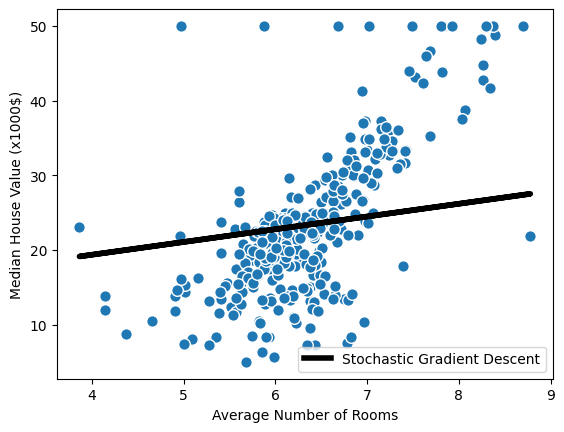

In [15]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_SGD.predict(X_train), color='black', lw=4, label='Stochastic Gradient Descent')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

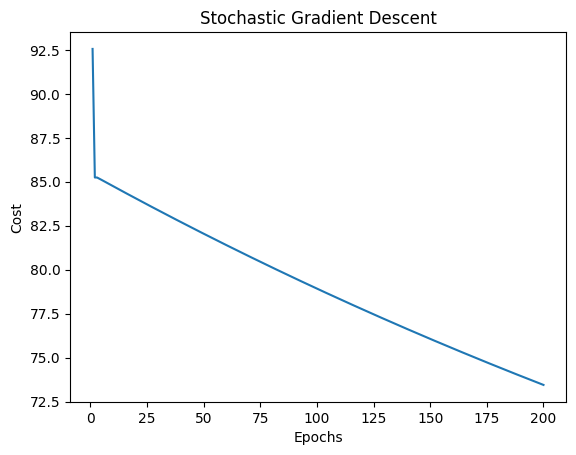

In [16]:
# Visualize the cost trend ### ***
plt.plot(range(1, len(reg_SGD.costs) + 1), reg_SGD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Stochastic Gradient Descent')
plt.show()

### Normal Equation (sklearn)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
# Intialize the Normal Equation model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train, y_train)

LinearRegression()

Visualize the prediction of Normal Equation model on Training Data

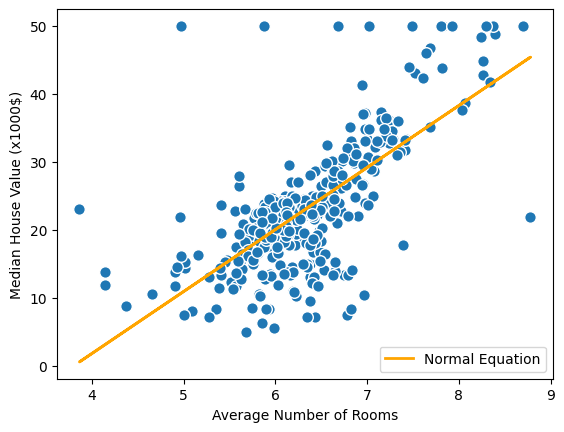

In [19]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_NE.predict(X_train), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Visualize all models on Training Data

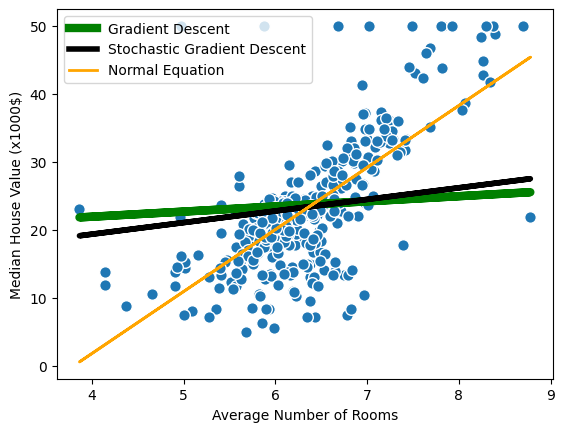

In [20]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_GD.predict(X_train), color='green', lw=6, label='Gradient Descent')
plt.plot(X_train, reg_SGD.predict(X_train), color='black', lw=4, label='Stochastic Gradient Descent')
plt.plot(X_train, reg_NE.predict(X_train), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Algorithms Comparisons

Weight Comparisions

In [21]:
w_GD = reg_GD.w
w_SGD = reg_SGD.w
# w_NE = reg_NE.w ### ???
w_NE = np.concatenate((np.array([reg_NE.intercept_]),reg_NE.coef_), axis = 0)
print(w_GD)
print(w_SGD)
print(w_NE)

[18.91336402  0.75376432]
[12.5347117   1.70578624]
[-34.66230744   9.1181022 ]


Performance Comparisons (on Testing Set)

In [22]:
y_pred_GD = reg_GD.predict(X_test)

In [23]:
y_pred_SGD = reg_SGD.predict(X_test)

In [24]:
y_pred_NE = reg_NE.predict(X_test)

In [25]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

In [26]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 6.512052
MAE of SGD: 6.01941
MAE of NE: 4.314224


In [27]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 73.704859
MSE of SGD: 65.549636
MSE of NE: 40.35145


In [28]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.010847
R2 of SGD: 0.120294
R2 of NE: 0.458465


## Experiment with Standardized Data

In [29]:
# Re-load the dataset
housing_dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/boston_housing.csv")

In [30]:
# load the package for standardizing data (Standard Scaler)
from sklearn.preprocessing import StandardScaler

In [31]:
# Standardize the 'RM' column
scaler = StandardScaler()
housing_dataset[['RM']] = scaler.fit_transform(housing_dataset[['RM']])

In [32]:
# X_new <- 'RM' column, y <- 'MEDV' column
X_new = housing_dataset.loc[:, ['RM']].to_numpy()
y = housing_dataset.loc[:, 'MEDV'].to_numpy()

In [33]:
# Train-test spliting (7:3, random state = 42)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_new, y, test_size= 0.3, random_state = 42)

### Gradient Descent

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [23.01581921  6.40020122]
"LEARNING RATE" is:  0.001
learning at epoch = 0, i =  0


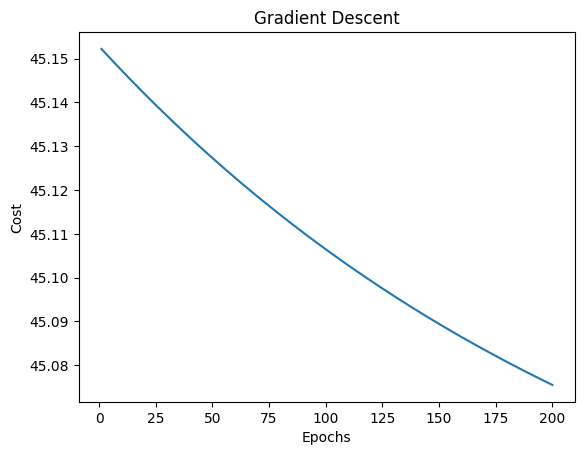

In [34]:
# Initalize the Gradient Descent model with: learning rate = 1e-3, max_iter = 200, random_state = 42
reg_GD = LinearRegressionScratch(n_features= X_train_norm.shape[1], random_state= 42,
                                 learning_rate= 1e-3, n_epochs= 200, batch_size= -1, pow_strength= 0)

# Train model on standardized data
reg_GD.fit(X_train_norm, y_train)


# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

Visualize the prediction of Gradient Descent model on Training Data



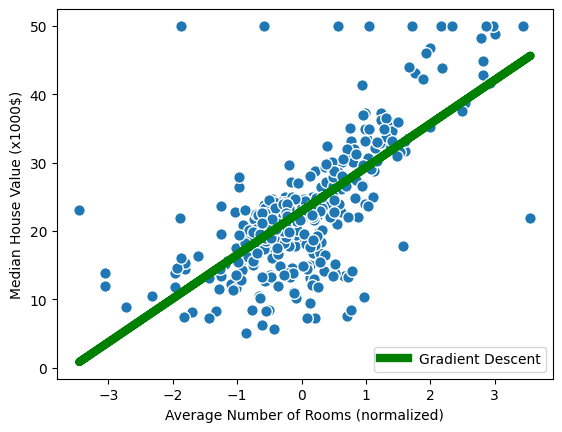

In [35]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_GD.predict(X_train_norm), color='green', lw=6, label='Gradient Descent')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Stochastic Gradient Descent

In [36]:
# Initalize the Stochastic Gradient Descent model with: eta0 = 1e-3, max_iter = 200, random_state=42, learning_rate = 'constant'
reg_SGD = LinearRegressionScratch(n_features= X_train_norm.shape[1], random_state= 42,
                                 learning_rate= 1e-3, n_epochs= 200, batch_size= 1, pow_strength= 0)

# Train SGD model on standardized data
reg_SGD.fit(X_train_norm, y_train)

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [23.01581921  6.40020122]
"LEARNING RATE" is:  0.001
learning at epoch = 0, i =  0
learning at epoch = 0, i =  1
learning at epoch = 0, i =  2
learning at epoch = 0, i =  3
learning at epoch = 0, i =  351
learning at epoch = 0, i =  352
learning at epoch = 0, i =  353


Visualize the prediction of Stochastic Gradient Descent model on Training Data


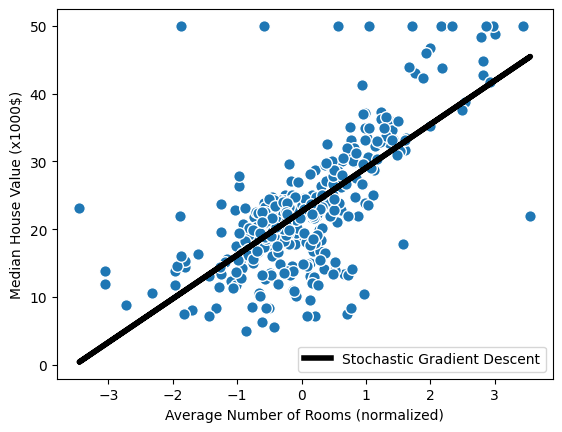

In [37]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_SGD.predict(X_train_norm), color='black', lw=4, label='Stochastic Gradient Descent')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

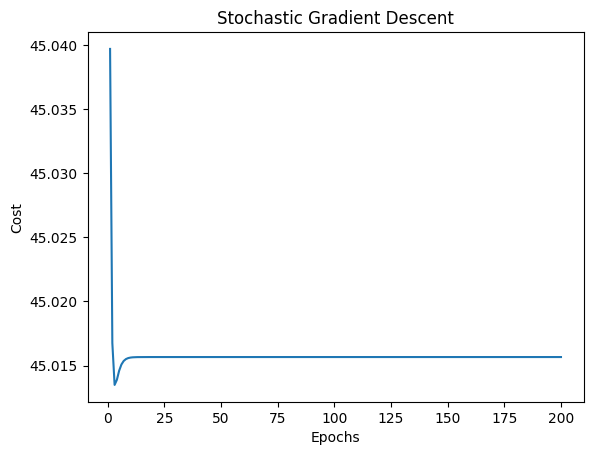

In [38]:
# Visualize the cost trend ### ***
plt.plot(range(1, len(reg_SGD.costs) + 1), reg_SGD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Stochastic Gradient Descent')
plt.show()

- Lí giải:
  - Nguyên nhân mà **cost tăng ngược trở lại** là do với ***SGD*** ta *cập nhật theo từng điểm dữ liệu một* (trong khi cost ở đây là chi phí của toàn bộ điểm dữ liệu).
  - Điều này không quá ảnh hưởng, do ta có thể loại bỏ điều này bằng chi tiết cài đặt sau:

In [39]:
# pick param that have min cost
# self.w = self.inlearn_params[np.argmin(self.costs)]

### Normal Equation (sklearn)

In [40]:
# Initalize the Normal Equation model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train_norm, y_train)

LinearRegression()

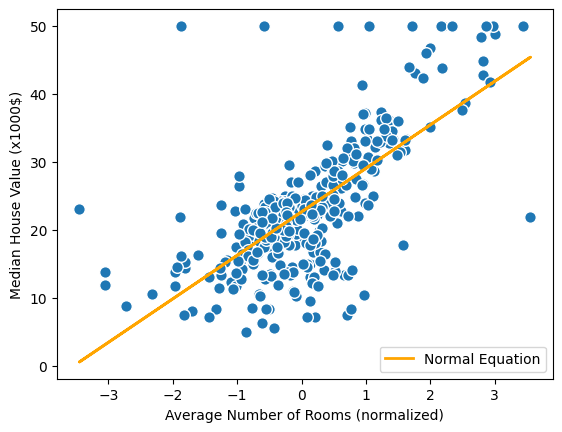

In [41]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_NE.predict(X_train_norm), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Visualize all models on Training Data

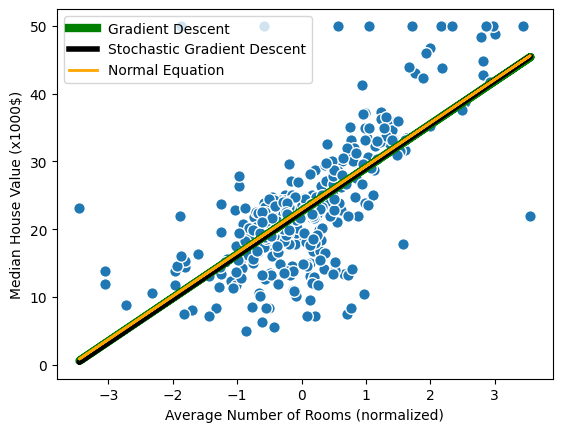

In [42]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_NE.predict(X_train_norm), color='green', lw=6, label='Gradient Descent')
plt.plot(X_train_norm, reg_SGD.predict(X_train_norm), color='black', lw=4, label='Stochastic Gradient Descent')
plt.plot(X_train_norm, reg_GD.predict(X_train_norm), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Algorithms Comparisons

In [43]:
w_GD = reg_GD.w
w_GD

array([22.89242451,  6.39438404])

In [44]:
w_SGD = reg_SGD.w
w_SGD

array([22.59905782,  6.43502429])

In [45]:
# w_NE = reg_NE.w ### ***
w_NE = np.concatenate((np.array([reg_NE.intercept_]),reg_NE.coef_), axis = 0)
w_NE

array([22.64163118,  6.40020122])

In [46]:
y_pred_GD = reg_GD.predict(X_test_norm)

In [47]:
y_pred_SGD = reg_SGD.predict(X_test_norm)

In [48]:
y_pred_NE = reg_NE.predict(X_test_norm)

In [49]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 4.339058
MAE of SGD: 4.309515
MAE of NE: 4.314224


In [50]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 40.59605
MSE of SGD: 40.326493
MSE of NE: 40.35145


In [51]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.455182
R2 of SGD: 0.4588
R2 of NE: 0.458465


# Multiple Linear Regression (n independent variable (n >=2) + 1 target variable)

## Experiment with normal data

In [52]:
# Re-load dataset
housing_dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/boston_housing.csv")

In [53]:
housing_dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


* X: 13 remaining variables (except 'MEDV' variable)
* y: 'MEDV' variable

In [54]:
X = housing_dataset.iloc[:, :-1].to_numpy()
y = housing_dataset.iloc[:, -1].to_numpy()

In [55]:
# Train-test set spliting with ratio 7:3, random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Gradient Descent

In [56]:
### ***
print(X_train.shape)
print(y_test.shape)

(354, 13)
(152,)


- Experiment with:
-- max_iter = 200
-- random_state = 42
-- learning_rate (eta) = {1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8}
- What is the suitable learning rate value?

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [2.30158192e+01 1.20190271e-06 0.00000000e+00 5.00296668e-05
 0.00000000e+00 3.18023945e-04 2.81108806e-04 1.94029505e-05
 1.38075089e-04 4.87734211e-05 2.11474700e-04 3.17321217e-04
 4.09509320e-07 6.41123109e-05]
"LEARNING RATE" is:  0.001
learning at epoch = 0, i =  0


<ipython-input-9-ed55db13fb48>:99: RuntimeWarning: divide by zero encountered in double_scalars
  self.w[i] = (np.mean(y)/np.mean(x)) / (np.max(y)/np.min(x)) * self.learning_rate
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
<ipython-input-9-ed55db13fb48>:89: RuntimeWarning: overflow encountered in square
  return np.mean((y_pred - y)**2)
<ipython-input-9-ed55db13fb48>:60: RuntimeWarning: invalid value encountered in multiply
  return np.sum(X * self.w, axis = 1)
<ipython-input-9-ed55db13fb48>:73: RuntimeWarning: invalid value encountered in multiply
  return 2 * np.mean(X * (y_pred - y).reshape((-1, 1)), axis = 0)


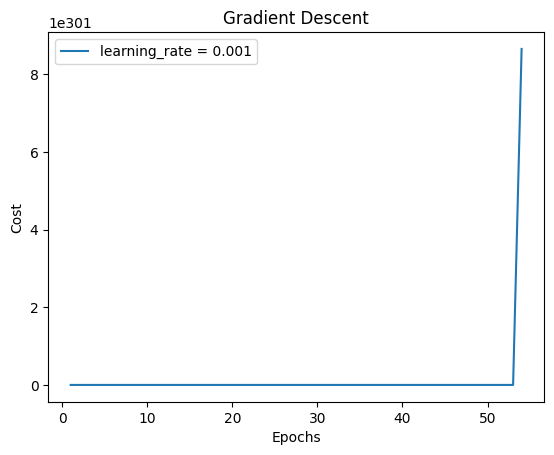

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [2.30158192e+01 1.20190271e-07 0.00000000e+00 5.00296668e-06
 0.00000000e+00 3.18023945e-05 2.81108806e-05 1.94029505e-06
 1.38075089e-05 4.87734211e-06 2.11474700e-05 3.17321217e-05
 4.09509320e-08 6.41123109e-06]
"LEARNING RATE" is:  0.0001
learning at epoch = 0, i =  0


<ipython-input-9-ed55db13fb48>:141: RuntimeWarning: invalid value encountered in subtract
  self.w -= self.learning_rate * velocity


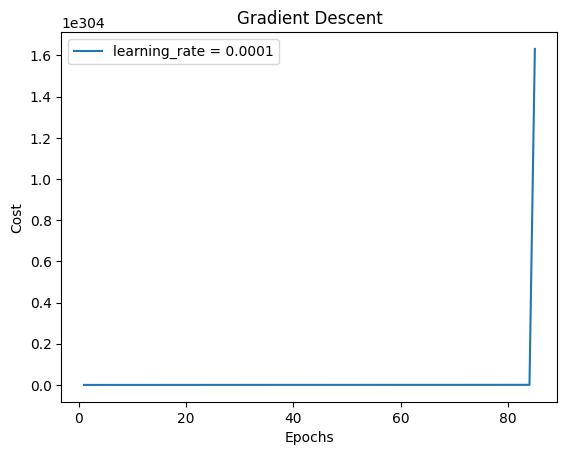

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [2.30158192e+01 1.20190271e-08 0.00000000e+00 5.00296668e-07
 0.00000000e+00 3.18023945e-06 2.81108806e-06 1.94029505e-07
 1.38075089e-06 4.87734211e-07 2.11474700e-06 3.17321217e-06
 4.09509320e-09 6.41123109e-07]
"LEARNING RATE" is:  1e-05
learning at epoch = 0, i =  0


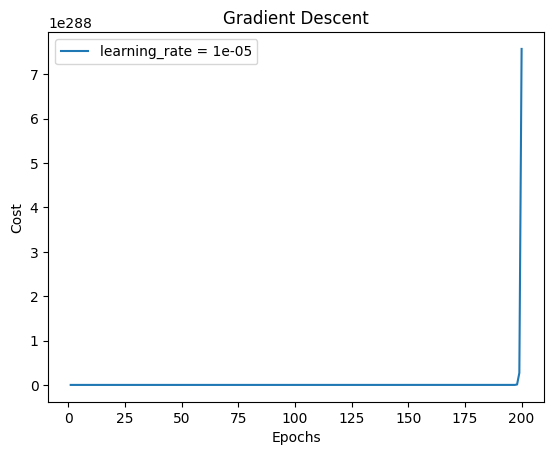

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [2.30158192e+01 1.20190271e-09 0.00000000e+00 5.00296668e-08
 0.00000000e+00 3.18023945e-07 2.81108806e-07 1.94029505e-08
 1.38075089e-07 4.87734211e-08 2.11474700e-07 3.17321217e-07
 4.09509320e-10 6.41123109e-08]
"LEARNING RATE" is:  1e-06
learning at epoch = 0, i =  0


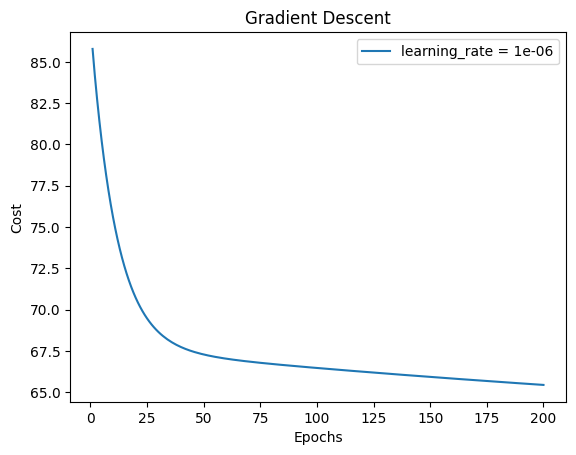

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [2.30158192e+01 1.20190271e-10 0.00000000e+00 5.00296668e-09
 0.00000000e+00 3.18023945e-08 2.81108806e-08 1.94029505e-09
 1.38075089e-08 4.87734211e-09 2.11474700e-08 3.17321217e-08
 4.09509320e-11 6.41123109e-09]
"LEARNING RATE" is:  1e-07
learning at epoch = 0, i =  0


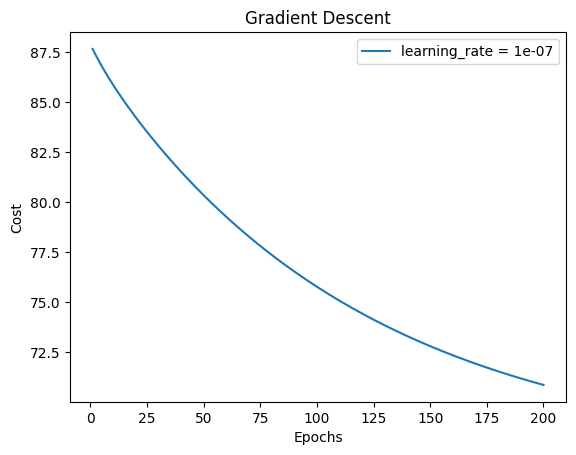

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [2.30158192e+01 1.20190271e-11 0.00000000e+00 5.00296668e-10
 0.00000000e+00 3.18023945e-09 2.81108806e-09 1.94029505e-10
 1.38075089e-09 4.87734211e-10 2.11474700e-09 3.17321217e-09
 4.09509320e-12 6.41123109e-10]
"LEARNING RATE" is:  1e-08
learning at epoch = 0, i =  0


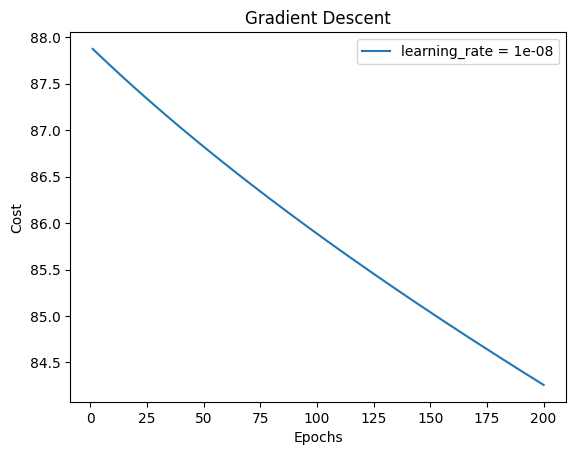

In [57]:
for learning_rate in [1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8]:
  # Initalize the GD model
  reg_GD = LinearRegressionScratch(n_features = X_train.shape[1], random_state= 42,
                                  learning_rate = learning_rate, n_epochs = 200, batch_size = -1, pow_strength = 0)

  # Train model
  reg_GD.fit(X_train, y_train)

  # Visualize the cost trend
  plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs, label = f'learning_rate = {learning_rate}')
  plt.xlabel('Epochs')
  plt.ylabel('Cost')
  plt.title('Gradient Descent')
  plt.legend()
  plt.show()

- Respond:
  - The suitable learning_rate is ***1e-6***

<ipython-input-9-ed55db13fb48>:99: RuntimeWarning: divide by zero encountered in double_scalars
  self.w[i] = (np.mean(y)/np.mean(x)) / (np.max(y)/np.min(x)) * self.learning_rate


---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [2.30158192e+01 1.20190271e-09 0.00000000e+00 5.00296668e-08
 0.00000000e+00 3.18023945e-07 2.81108806e-07 1.94029505e-08
 1.38075089e-07 4.87734211e-08 2.11474700e-07 3.17321217e-07
 4.09509320e-10 6.41123109e-08]
"LEARNING RATE" is:  1e-06
learning at epoch = 0, i =  0


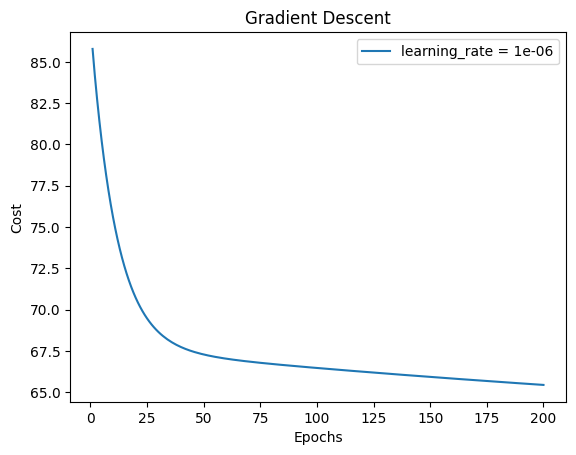

In [58]:
# Initalize the GD model
reg_GD = LinearRegressionScratch(n_features = X_train.shape[1], random_state= 42,
                                learning_rate = 1e-6, n_epochs = 200, batch_size = -1, pow_strength = 0)

# Train model
reg_GD.fit(X_train, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs, label = f'learning_rate = {1e-6}')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.legend()
plt.show()

### Stochastic Gradient Descent

In [59]:
# Initialize the SGD model
reg_SGD = LinearRegressionScratch(n_features = X_train.shape[1], random_state= 42,
                                learning_rate = 1e-6, n_epochs = 200, batch_size = 1, pow_strength = 0)

# Train model
reg_SGD.fit(X_train, y_train)

<ipython-input-9-ed55db13fb48>:99: RuntimeWarning: divide by zero encountered in double_scalars
  self.w[i] = (np.mean(y)/np.mean(x)) / (np.max(y)/np.min(x)) * self.learning_rate


---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [2.30158192e+01 1.20190271e-09 0.00000000e+00 5.00296668e-08
 0.00000000e+00 3.18023945e-07 2.81108806e-07 1.94029505e-08
 1.38075089e-07 4.87734211e-08 2.11474700e-07 3.17321217e-07
 4.09509320e-10 6.41123109e-08]
"LEARNING RATE" is:  1e-06
learning at epoch = 0, i =  0
learning at epoch = 0, i =  1
learning at epoch = 0, i =  2
learning at epoch = 0, i =  3
learning at epoch = 0, i =  351
learning at epoch = 0, i =  352
learning at epoch = 0, i =  353


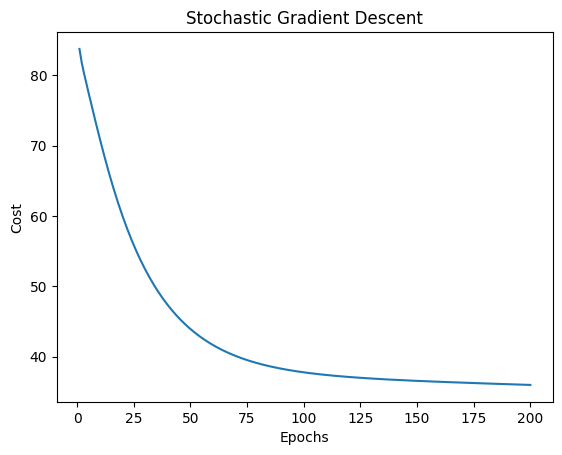

In [60]:
# Visualize the cost trend ### ***
plt.plot(range(1, len(reg_SGD.costs) + 1), reg_SGD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Stochastic Gradient Descent')
plt.show()

### Normal Equation

In [61]:
# Add the '1' column to data
### ???

In [62]:
# Intialize the NE model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train, y_train)

LinearRegression()

### Algorithms Comparisons

In [63]:
w_GD = reg_GD.w
w_GD

array([ 2.30158707e+01, -4.10889395e-03,  1.52877868e-02, -3.67339939e-03,
        2.17619609e-04, -2.44984617e-05,  1.87215806e-03, -1.00585621e-02,
        2.43617937e-04, -2.68314762e-04, -1.79545015e-02, -1.66616524e-03,
        2.22267036e-02, -1.28981518e-02])

In [64]:
w_SGD = reg_SGD.w
w_SGD

array([ 2.30345291e+01, -9.93199434e-02,  5.80501003e-02, -3.38520364e-02,
        5.44765817e-02,  1.11573957e-02,  3.89478406e-01,  7.67667724e-02,
       -2.34792513e-01,  1.31137420e-01,  1.93305325e-03, -2.35128247e-01,
        1.60045102e-02, -8.53263944e-01])

In [65]:
# w_NE = reg_NE.w ### ???
w_NE = np.concatenate((np.array([reg_NE.intercept_]),reg_NE.coef_), axis = 0)
w_NE

array([ 3.16310840e+01, -1.33470103e-01,  3.58089136e-02,  4.95226452e-02,
        3.11983512e+00, -1.54170609e+01,  4.05719923e+00, -1.08208352e-02,
       -1.38599824e+00,  2.42727340e-01, -8.70223437e-03, -9.10685208e-01,
        1.17941159e-02, -5.47113313e-01])

In [66]:
y_pred_GD = reg_GD.predict(X_test)

In [67]:
y_pred_SGD = reg_SGD.predict(X_test)

In [68]:
y_pred_NE = reg_NE.predict(X_test)

In [69]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 5.528594
MAE of SGD: 4.277363
MAE of NE: 3.16271


In [70]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 53.883901
MSE of SGD: 33.228642
MSE of NE: 21.517444


In [71]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.276853
R2 of SGD: 0.554056
R2 of NE: 0.711226


## Experiment with Standardized Data

In [72]:
# Re-load dataset
housing_dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/boston_housing.csv")

In [73]:
# Get the columns' names
name_columns = housing_dataset.columns.values
name_columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], dtype=object)

In [74]:
# Initialize the standardize scaler
scaler = StandardScaler()

# Standardize all independent variables
housing_dataset[name_columns[:-1]] = scaler.fit_transform(housing_dataset[name_columns[:-1]])

X_new <- 13 independent variables

y <- 'MEDV' column

In [75]:
X_new = housing_dataset.iloc[:, :-1].to_numpy()
y = housing_dataset.iloc[:, -1].to_numpy()

In [76]:
# Split train-test set (7:3, random_state = 42)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state = 42)

In [77]:
print(X_train_norm.shape)
print(y_test.shape)
print(X_train_norm[0])
print(y_train[0])
print(X_test_norm[0])
print(y_test[0])

(354, 13)
(152,)
[-0.41704368 -0.48772236 -1.30687771 -0.27259857 -0.83528384  0.20709638
 -0.35115713  1.07773662 -0.75292215 -1.10611514  0.1130321   0.41057102
 -1.04332233]
28.7
[-0.40983668 -0.48772236 -1.03402724 -0.27259857 -0.38609067  0.18715116
  0.55208139 -0.54607682 -0.52300145 -0.66660821 -0.85792914  0.42570183
 -0.50645674]
23.6


### Gradient Descent

- Experiment with following learning rates = {1e-3, 1e-5, 1e-4}
- max_iter = 200
- random_state = 42

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [ 2.30158192e+01  1.15513216e-02 -1.29738854e-01  1.22577612e+00
 -7.44558747e-03 -3.04623293e-02 -2.71631150e-02 -1.34470807e-01
  4.20638538e-02  3.52782680e-02  8.52365948e-02  1.51795690e-02
 -5.41769218e-02  2.16789268e-02]
"LEARNING RATE" is:  0.001
learning at epoch = 0, i =  0
---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [ 2.30158192e+01  1.15513216e-04 -1.29738854e-03  1.22577612e-02
 -7.44558747e-05 -3.04623293e-04 -2.71631150e-04 -1.34470807e-03
  4.20638538e-04  3.52782680e-04  8.52365948e-04  1.51795690e-04
 -5.41769218e-04  2.16789268e-04]
"LEARNING RATE" is:  1e-05
learning at epoch = 0, i =  0
---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [ 2.30158192e+01  1.15513216e-03 -1.29738854e-02  1.22577612e-01
 -7.44558747e-04 -3.04623293e-03 -2.71631150e-03 -1.34470807e-02
  4.20638538e-03  3.52782680e-03  8.5236

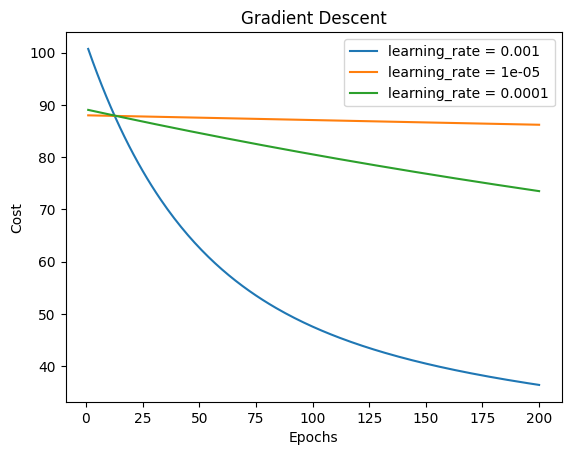

In [78]:
for learning_rate in [1e-3, 1e-5, 1e-4]:
  # Initalize the GD model
  reg_GD = LinearRegressionScratch(n_features = X_train_norm.shape[1], random_state= 42,
                                  learning_rate = learning_rate, n_epochs = 200, batch_size = -1, pow_strength = 0)

  # Train model on normalized data
  reg_GD.fit(X_train_norm, y_train)

  # Visualize the cost trend
  plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs, label = f'learning_rate = {learning_rate}')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.legend()
plt.show()

- Respond:
  - the suitable learning_rate is ***1e-3***, because it converges the best

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [ 2.30158192e+01  1.15513216e-02 -1.29738854e-01  1.22577612e+00
 -7.44558747e-03 -3.04623293e-02 -2.71631150e-02 -1.34470807e-01
  4.20638538e-02  3.52782680e-02  8.52365948e-02  1.51795690e-02
 -5.41769218e-02  2.16789268e-02]
"LEARNING RATE" is:  0.001
learning at epoch = 0, i =  0


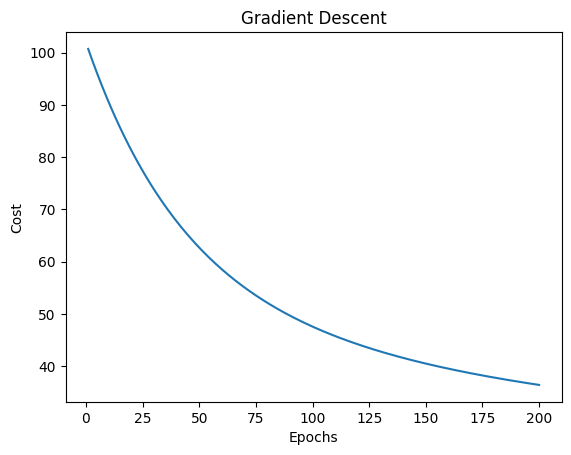

In [79]:
# Initalize the GD model
reg_GD = LinearRegressionScratch(n_features = X_train_norm.shape[1], random_state= 42,
                                learning_rate = 1e-3, n_epochs = 200, batch_size = -1, pow_strength = 0)

# Train model on normalized data
reg_GD.fit(X_train_norm, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

### Stochastic Gradient Descent

In [80]:
# Initialize SGD model (eta0=1e-4, max_iter=200, random_state=42, learning_rate='constant')
reg_SGD = LinearRegressionScratch(n_features = X_train_norm.shape[1], random_state= 42,
                                learning_rate = 1e-4, n_epochs = 200, batch_size = 1, pow_strength = 0)

# Train model
reg_SGD.fit(X_train_norm, y_train)

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [ 2.30158192e+01  1.15513216e-03 -1.29738854e-02  1.22577612e-01
 -7.44558747e-04 -3.04623293e-03 -2.71631150e-03 -1.34470807e-02
  4.20638538e-03  3.52782680e-03  8.52365948e-03  1.51795690e-03
 -5.41769218e-03  2.16789268e-03]
"LEARNING RATE" is:  0.0001
learning at epoch = 0, i =  0
learning at epoch = 0, i =  1
learning at epoch = 0, i =  2
learning at epoch = 0, i =  3
learning at epoch = 0, i =  351
learning at epoch = 0, i =  352
learning at epoch = 0, i =  353


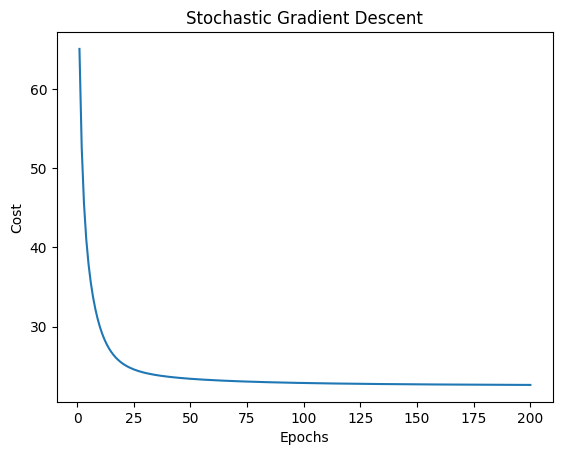

In [81]:
# Visualize the cost trend ### ***
plt.plot(range(1, len(reg_SGD.costs) + 1), reg_SGD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Stochastic Gradient Descent')
plt.show()

### Normal Equation (sklearn)

In [82]:
# Initialize NE model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train_norm, y_train)

LinearRegression()

### Algorithms Comparisons

In [83]:
w_GD = reg_GD.w
w_GD

array([22.96146685, -0.60016239,  0.35747711,  0.38333417,  0.61969006,
       -0.6405002 ,  1.70609093, -0.58452759,  0.13588291, -0.45835163,
       -0.61758932, -1.0635625 ,  0.54229879, -1.62595181])

In [84]:
# w_SGD = np.append(reg_SGD.intercept_, reg_SGD.coef_) ### ???
w_SGD = reg_SGD.w
w_SGD

array([22.50088697, -1.04754809,  0.64943174,  0.08412812,  0.8425799 ,
       -1.54404266,  2.92182127, -0.35333686, -2.7228398 ,  1.36823026,
       -0.69940161, -1.91498747,  1.06939156, -3.88686454])

In [85]:
w_NE = np.append(reg_NE.intercept_, reg_NE.coef_)
w_NE

array([22.50945471, -1.14691411,  0.83432605,  0.33940694,  0.79163612,
       -1.784727  ,  2.84783949, -0.30429306, -2.91562521,  2.11140045,
       -1.46519951, -1.9696347 ,  1.07567771, -3.90310727])

In [86]:
y_pred_GD = reg_GD.predict(X_test_norm)

In [87]:
y_pred_SGD = reg_SGD.predict(X_test_norm)

In [88]:
y_pred_NE = reg_NE.predict(X_test_norm)

In [89]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 4.153957
MAE of SGD: 3.186631
MAE of NE: 3.16271


In [90]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 32.717402
MSE of SGD: 22.100764
MSE of NE: 21.517444


In [91]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.560917
R2 of SGD: 0.703398
R2 of NE: 0.711226


# Explain what $R^2$ coefficient is.

- Hệ số xác định hay $R^2$ là một thông số thống kê biểu thị *tỷ lệ* phương sai - $var$ trong ***biến phụ thuộc*** $y$ có thể được giải thích bằng ***các biến độc lập*** $x_1, x_2,.., x_d$ trong mô hình hồi quy.
- Đây là số liệu đánh giá thường được sử dụng trong bài toán hồi quy *Regression* để đánh giá mức độ phù hợp của một mô hình.

### Formula

- Có một số định nghĩa khác nhau về công thức của $R^2$, tuy nhiên công thức sau đây là phổ biến nhất (được sklearn sử dụng):

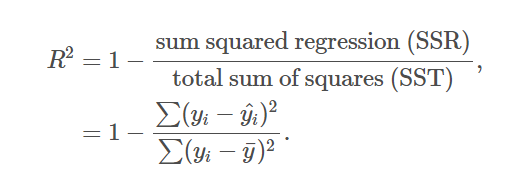

Figure: Công thức $R^2$

### Interpretation

- Theo công thức trên, ta để ý rằng $SST$ của tập dữ liệu là một hằng số, vì vậy giống như $MSE$ thì $R^2$ **phụ thuộc vào** $SSR$ của dự đoán bởi mô hình, khi $SSR$ **càng lớn** thì $R^2$ **càng nhỏ** và ngược lại.
- Tuy nhiên, $R^2$ là một **tỷ lệ** thay vì là một giá trị sai số trung bình như $MSE$.
  - $R^2 = 0$: Điều này có nghĩa rằng không có không có sự biến thiên nào của biến phụ thuộc $y$ được giải thích bằng các biến độc lập trong mô hình, hay nói cách khác **mô hình không phù hợp với dữ liệu**. Xảy ra khi $SSR = SST$.
  - $R^2 = 1$: Điều này có nghĩa rằng tất cả sự biến thiên trong biến phụ thuộc $y$ có thể được giải thích bởi các biến độc lập trong mô hình, khi đó **mô hình hoàn toàn khớp với dữ liệu**. Xảy ra khi $SSR = 0$.
  - Thông thường thì **$0 < R^2 < 1$**, tuy nhiên nếu $SSR > SST$ thì $R^2$ **có thể âm**. Điều này chỉ ra rằng mô hình chưa khớp với tập dữ liệu hay mô hình đang có thể bị *underfitting*. Nói cách khác mô hình của chúng ta đang dự đoán kết quả tệ hơn một *mô hình không học* mà chỉ luôn dự đoán $y_{pred} = mean(y)$
  - Đó là lí do mà trong bài báo cáo này ta sẽ khởi tạo **$w0 = mean(y)$** để có thể mong muốn "xấp xỉ" rằng **SSR sẽ được khỏi tạo gần SST** (hàm ***initParam*** của LinearRegressionScratch).



### Intuition

- Giả sử rằng *tập dữ liệu trong thực tế* được biểu diễn bởi đường thẳng **$y_{right}$**, với biến độc lập **$x$** giới hạn trong đoạn $[A, B]$, khi đó:
  - Gọi $y_{mean}$ là giá giá trị trung bình của $y_{right}$ trên đoạn $[A, B]$
  - Đường thẳng **$y_{pred}$** là *mô hình dự đoán*
- Biểu diễn các đường thẳng trên bởi ví dụ plot sau:


In [92]:
x = np.arange(0, 10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [93]:
y_right = 0.3 * x + 0.1
y_right

array([0.1, 0.4, 0.7, 1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8])

In [94]:
y_mean = np.repeat(np.mean(y_right), len(x))
y_mean

array([1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45])

In [95]:
y_pred = 0.125 * x + 1
y_pred

array([1.   , 1.125, 1.25 , 1.375, 1.5  , 1.625, 1.75 , 1.875, 2.   ,
       2.125])

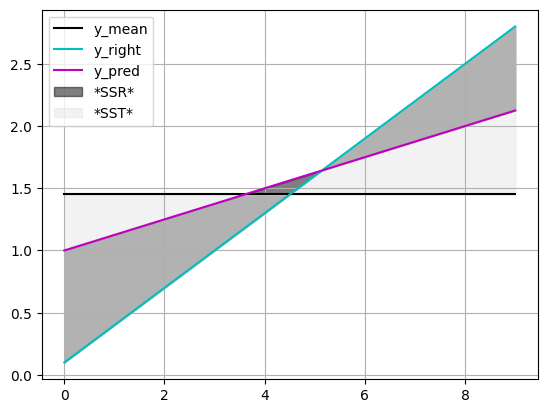

In [96]:
plt.plot(x, y_mean, label = 'y_mean', color = 'black')
plt.plot(x, y_right, label = 'y_right', color = 'c')
plt.plot(x, y_pred, label = 'y_pred', color = 'm')
plt.fill_between(x, y_right, y_pred, interpolate = True, label = '*SSR*', alpha = 0.5, color = '0', cmap = 'viridis')
plt.fill_between(x, y_mean, y_right, interpolate = True, label = '*SST*', alpha = 0.5, color = '0.9', cmap = 'viridis')
plt.legend(loc='upper left')
plt.grid()

- Ta thấy phần diện tích giới hạn bởi 2 đường thẳng $y_{right}$ và $y_{pred}$ (**màu đen**) biểu thị tỉ lệ với $SSR$
- Phần diện tích giới hạn bởi 2 đường thẳng $y_{right}$ và $y_{mean}$ (**màu trắng**) biểu thị tỉ lệ với $SST$

In [97]:
ssr = (y_pred - y_right)**2 + y_mean
ssr

array([2.26    , 1.975625, 1.7525  , 1.590625, 1.49    , 1.450625,
       1.4725  , 1.555625, 1.7     , 1.905625])

In [98]:
sst = (y_right - y_mean)**2 + y_mean
sst

array([3.2725, 2.5525, 2.0125, 1.6525, 1.4725, 1.4725, 1.6525, 2.0125,
       2.5525, 3.2725])

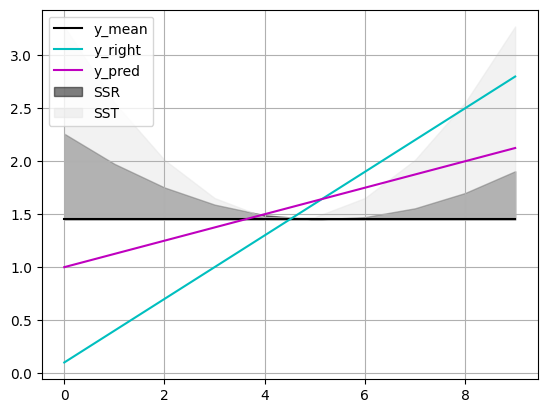

In [99]:
plt.plot(x, y_mean, label = 'y_mean', color = 'black')
plt.plot(x, y_right, label = 'y_right', color = 'c')
plt.plot(x, y_pred, label = 'y_pred', color = 'm')
plt.fill_between(x, ssr, y_mean, interpolate = True, label = 'SSR', alpha = 0.5, color = '0', cmap = 'viridis')
plt.fill_between(x, sst, y_mean, interpolate = True, label = 'SST', alpha = 0.5, color = '0.9', cmap = 'viridis')
plt.legend(loc='upper left')
plt.grid()

- Một cách trực giác, ta có thể hiểu rằng $R^2$ chính là **mối quan hệ tỷ lệ** giữa **phần diện tích màu đen** $SSR$ với **phần diện tích màu trắng** $SST$

### Why should we use $R^2$

- Là một con số biểu thị **tỷ lệ** nên giúp ta dễ dàng thấy được *mức độ phù hợp của mô hình với tập dữ liệu* hơn là sử dụng các giá trị sai số.
- Đánh giá được mức độ phù hợp của mô hình trong việc giải thích *sự biến thiên của biến phụ thuộc* $y$ vào các biến độc lập $x$.
- So sánh được hiệu suất giữa các mô hình hồi quy khác nhau.
- Một cách trực giác, ta có thể hiểu rằng tỷ lệ $R^2$ chính là **tỷ lệ hiệu suất** giữa mô hình dự đoán mà chúng ta đã cho *learning* so với một mô hình không học *non-learning* (luôn dự đoán bằng mean(y)).

- Nhược điểm:
  - Không đánh giá được phân bố sai số (lỗi) của mô hình
  - Xác định mô hình đang bị underfitting hay overfitting không?
  - --> Vì vậy, nên sử dụng kết hợp với các thông số khác chẳng hạn như $MSE$, $MAE$, và biểu đồ đánh giá sai số để có thể đánh giá hiệu suất của mô hình một cách toàn diện nhất.


# **Second Version**

- Trong phiên bản này chúng ta sẽ làm một bài báo cáo tương tự để so sánh các kết quả, nhưng sự khác biệt nằm ở cách cài đặt:
- Trong cách cài đặt này:
  - ***vector gradient*** là tổng của các điểm dữ liệu trong một batch_size, **không lấy trung bình**.
  - ***cost*** vẫn là *trung bình chi phí của tất cả các điểm dữ liệu dùng để huấn luyện sau khi hoàn toàn hoàn tất một epoch*

In [100]:
import numpy as np
import matplotlib.pyplot as plt

# Simple Linear Regression (1 independent variable + 1 target variable)

## Experiment with Original Data

### Load Data

In [101]:
# load package for loading data
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
housing_dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/boston_housing.csv")
housing_dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### Train-Test Set Spliting

Requirement:
* Use the average number of rooms (RM) to estimate the house price (MEDV)
* Split training, testing set with ratio 7:3 and random state = 42

In [103]:
X = housing_dataset.loc[:, ['RM']].to_numpy()
y = housing_dataset.loc[:, 'MEDV'].to_numpy()

In [104]:
# load package for spliting data
import sklearn
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Data Visualization

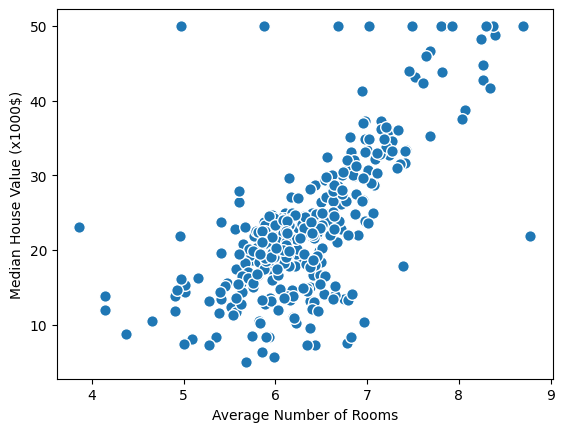

In [106]:
# visualize data
# xlabel: 'Average Number of Rooms'; ylabel: 'Median House Value (x1000$)'
plt.scatter(X_train, y_train, facecolor='tab:blue', edgecolor='white', s=70)
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.show()

### Linear Regression (Base)

In [107]:
def makePredictions(w: np.array, b: np.array, X: np.array) -> np.array: ### ???
  """
  - This is a function that predict output-variable for input-array of X
  - inputs:
    - w: np.array-(n_features)
    - b: np.array-(1)
    - X: np.array-(n_samples, n_features)
  - return:
    - y: np.array, shape (n_samples)
  """
  return np.sum(X * w + b, axis = 1)

### Gradient Descent

In [108]:
# main source code for all
class LinearRegressionScratch: ### ***
  """
  This is class of Linear Regression Model
  inputs:
  - n_features: number of features of input-variables
  - random_state: establish consistency in all execute the program
  - learning_rate: learning rate of Gradient Descent Algorithm
  - n_epochs: number of iterations over all samples
  - batch_size: number of samples in each batch
  - pow_strength: doubling the examples
  """
  def __init__(self, n_features: int, random_state: int= 42, learning_rate: np.array= 1e-3, n_epochs: int= 200, batch_size: float= -1, pow_strength: int= 0) -> None:
    self.random_state = random_state
    np.random.seed(self.random_state)
    self.n_features = n_features

    # init w randomly with n+1 features
    self.w = np.random.rand(self.n_features + 1)

    # set learning HP
    self.learning_rate = learning_rate
    self.n_epochs = n_epochs
    self.batch_size = batch_size
    self.pow_strength = pow_strength

    # costs and params
    self.costs = []
    self.inlearn_params = []

    # mode
    self.is_sum_gradient_mode = True ### ***


  def expandInputVariables(self, __X: np.array):
    """
    This is method that expand shape of X to (len(X), n_features + 1)
    inputs:
      - X: samples, type: np.array, constant
    """
    # change X
    X = __X.copy()
    if(X.shape[1] != self.n_features + 1):
      o = np.ones((len(X), 1))
      return np.concatenate((o, X), axis = 1)
    return X


  def predict(self, __X: np.array) -> np.array:
    """
    This is method that predict the outputs for samples X
    inputs:
      - X: samples, type: np.array-(len(X), n_features+1), constant
    return:
      - predictions for X, type: np.array-(len(X))
    """
    # change X
    X = __X.copy()
    # shape X
    if(len(X.shape) < 2):
      X.reshape(1, -1)
    X = self.expandInputVariables(X)
    return np.sum(X * self.w, axis = 1)


  def compute_gradient(self, __X: np.array, __y: np.array) -> np.array:
    """
    This is method that compute gradient for w
    """
    # change X, y
    X, y = __X.copy(), __y.copy()
    # shape X
    if(len(X.shape) < 2):
      X.reshape(1, -1)
    y_pred = self.predict(X)
    k = 2
    if(self.is_sum_gradient_mode): k = len(X)
    return k * np.mean(X * (y_pred - y).reshape((-1, 1)), axis = 0)


  def compute_cost(self, __X: np.array, __y: np.array, index: int = -1) -> np.array:
    """
    This is method that compute cost for w with dataset = (X, y)
    inputs:
      - X: samples, type: np.array-(len(X), n_features+1), constant
      - y: output-variable, type: np.array-(len(X))
    return:
      - cost of w, type: np.array-(1)
    """
    # change X, y
    X, y = __X.copy(), __y.copy()
    X = self.expandInputVariables(X)
    y_pred = self.predict(X)
    return np.mean((y_pred - y)**2)

  def initParam(self, X, y):
    # self.w = np.zeros(self.n_features + 1)
    nprd = np.random.RandomState(self.random_state)
    self.w = nprd.normal(loc=0.0, scale=0.01, size= 1 + self.n_features)
    self.w[0] = np.mean(y) ### *** ensure that R2 >= 0
    for i in range(1, X.shape[1]):
      x = X[:, i].reshape(len(X))
      if(self.n_features == 1):
        self.w[i] = np.sum((y - np.mean(y))*(x - np.mean(x))) / np.sum((x - np.mean(x))**2)
      else:
        self.w[i] = (np.mean(y)/np.mean(x)) / (np.max(y)/np.min(x)) * self.learning_rate


  def fit(self, __X: np.array, __y: np.array) -> None:
    """
    This is a method that learn from dataset (X, y)
    inputs:
      - X: samples, type: np.array-(len(X), n_features + 1), constant
      - y: output-variable, type: np.array-(len(X)), constant
    outcome:
      - model was fited
    """
    np.random.seed(self.random_state)
    # change X, y
    X, y = __X.copy(), __y.copy()
    ### randomly permutation
    ## X = np.random.permutation(X)
    X = self.expandInputVariables(X)
    for k in range(self.pow_strength):
      X = np.concatenate((X, X))
      y = np.concatenate((y, y))

    # init w0
    self.initParam(X, y)
    print("---------------------------------------")
    print('"LINEAR SCRATCH MODEL"')
    print('"W0" for learning is: ', self.w)
    print('"LEARNING RATE" is: ', self.learning_rate)

    # batch size
    if(self.batch_size <= 0):
      self.batch_size = int(len(X) * -self.batch_size)

    self.costs = []
    self.inlearn_params = []
    for i_epochs in range(self.n_epochs):
      # stochastic
      for i in range(0, len(X), self.batch_size):
        if(i_epochs == 0 and (i > 0.99 * len(X) or i < 0.01 * len(X))):
          print("learning at epoch = 0, i = ", i)
        # compute velocity
        velocity = self.compute_gradient(X[i: i+self.batch_size], y[i: i+self.batch_size])
        # update w'
        self.w -= self.learning_rate * velocity
      # compute loss at w After fully completing an epoch
      self.costs += [self.compute_cost(X, y)]
      self.inlearn_params += [self.w]

    # pick param that have min cost
    self.w = self.inlearn_params[np.argmin(self.costs)]

- Requirement: Experiment with
-- Different learning rate values: eta = {1e-2, 1e-3, 1e-4}
-- Maximum number of iterations = 200
-- Random state = 42
- What is the suitable 'learning rate' value?

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [23.01581921  9.1181022 ]
"LEARNING RATE" is:  0.01
learning at epoch = 0, i =  0


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
<ipython-input-108-d34c4249f88d>:94: RuntimeWarning: overflow encountered in square
  return np.mean((y_pred - y)**2)
<ipython-input-108-d34c4249f88d>:149: RuntimeWarning: invalid value encountered in subtract
  self.w -= self.learning_rate * velocity


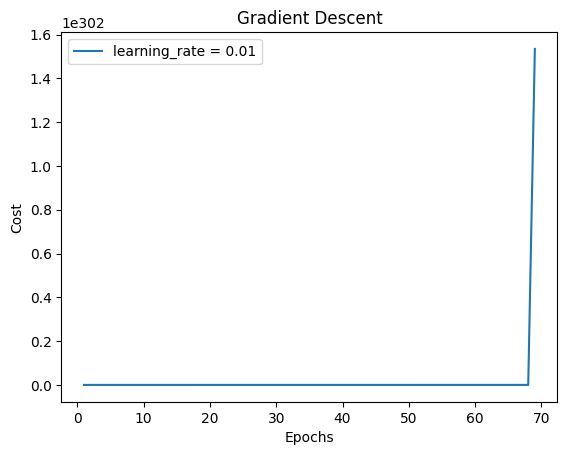

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [23.01581921  9.1181022 ]
"LEARNING RATE" is:  0.001
learning at epoch = 0, i =  0


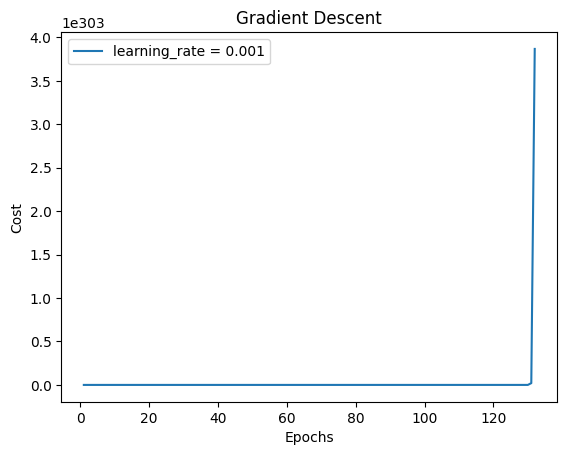

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [23.01581921  9.1181022 ]
"LEARNING RATE" is:  0.0001
learning at epoch = 0, i =  0


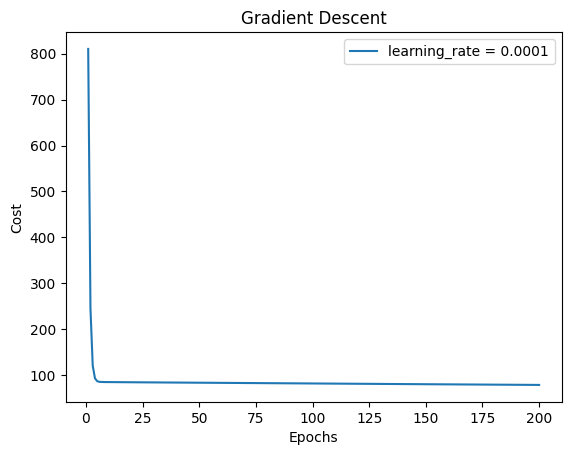

In [109]:
for learning_rate in [1e-2, 1e-3, 1e-4]:
  # Initialize the model
  reg_GD = LinearRegressionScratch(n_features= X_train.shape[1], random_state= 42,
                                  learning_rate= learning_rate, n_epochs= 200, batch_size= -1, pow_strength= 0)

  # Train model
  reg_GD.fit(X_train, y_train)

  # Visualize the cost trend
  plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs, label = f'learning_rate = {learning_rate}')
  plt.xlabel('Epochs')
  plt.ylabel('Cost')
  plt.title('Gradient Descent')
  plt.legend()
  plt.show()

- Respond:
  - The suitable 'learning rate' value is ***0.0001***, because it is the largest and converges.

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [23.01581921  9.1181022 ]
"LEARNING RATE" is:  0.0001
learning at epoch = 0, i =  0


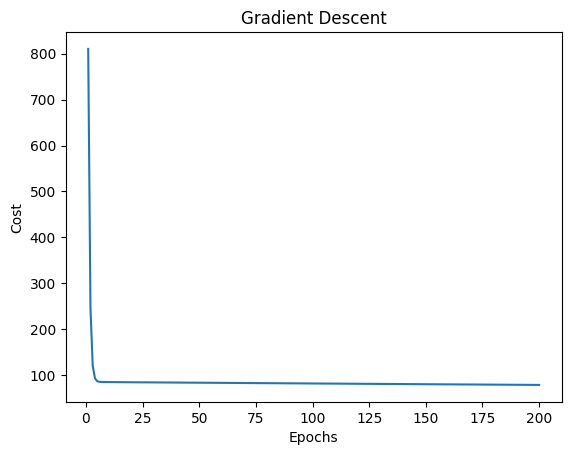

In [110]:
# Initialize the model
reg_GD = LinearRegressionScratch(n_features= X_train.shape[1], random_state= 42,
                                learning_rate= 0.0001, n_epochs= 200, batch_size= -1, pow_strength= 0)

# Train model
reg_GD.fit(X_train, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

Visualize the prediction of Gradient Descent model on Training Data

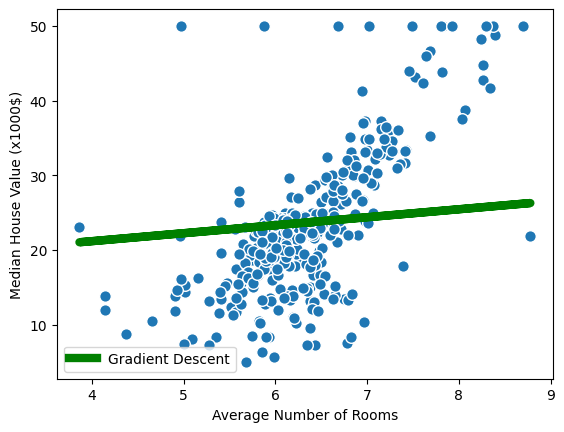

In [111]:
plt.scatter(X_train, y_train, facecolor='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_GD.predict(X_train), color='green', lw=6, label='Gradient Descent')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Stochastic Gradient Descent

In [112]:
# source code from Gradient Descent content ### ***

- Requirement: Experiment with
-- Different learning rate values: eta0 = 1e-4
-- Maximum number of iterations = 200
-- Random state = 42

In [113]:
# Initialize the model
reg_SGD = LinearRegressionScratch(n_features= X_train.shape[1], random_state= 42,
                                  learning_rate= 1e-4, n_epochs= 200, batch_size= 1, pow_strength= 0)

# Train model
reg_SGD.fit(X_train, y_train)

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [23.01581921  9.1181022 ]
"LEARNING RATE" is:  0.0001
learning at epoch = 0, i =  0
learning at epoch = 0, i =  1
learning at epoch = 0, i =  2
learning at epoch = 0, i =  3
learning at epoch = 0, i =  351
learning at epoch = 0, i =  352
learning at epoch = 0, i =  353


Visualize the prediction of Stochastic Gradient Descent model on Training Data

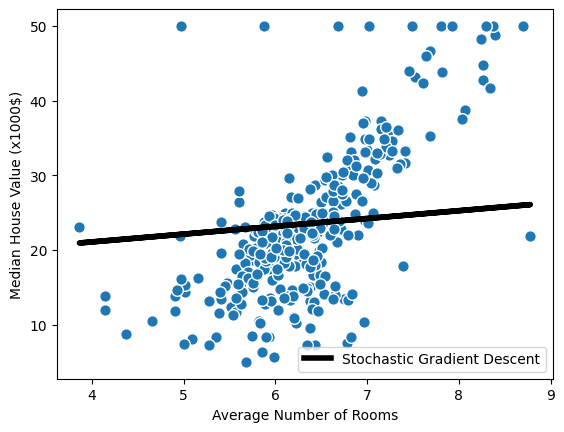

In [114]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_SGD.predict(X_train), color='black', lw=4, label='Stochastic Gradient Descent')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

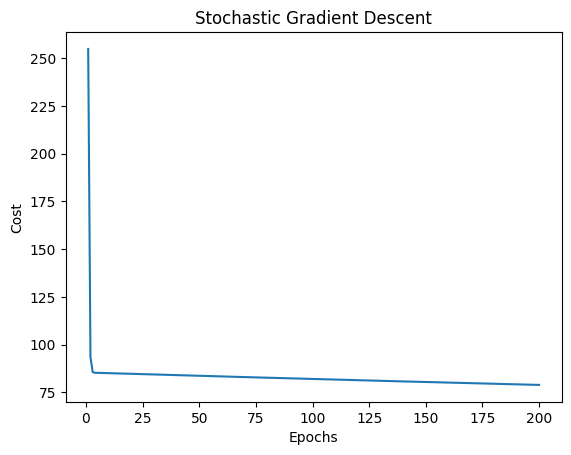

In [115]:
# Visualize the cost trend ### ***
plt.plot(range(1, len(reg_SGD.costs) + 1), reg_SGD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Stochastic Gradient Descent')
plt.show()

### Normal Equation (sklearn)

In [116]:
from sklearn.linear_model import LinearRegression

In [117]:
# Intialize the Normal Equation model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train, y_train)

LinearRegression()

Visualize the prediction of Normal Equation model on Training Data

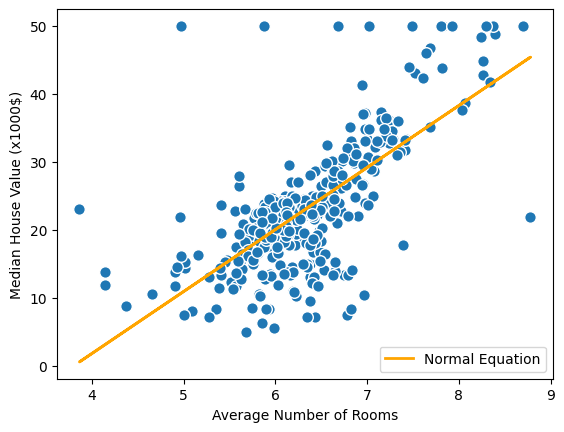

In [118]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_NE.predict(X_train), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Visualize all models on Training Data

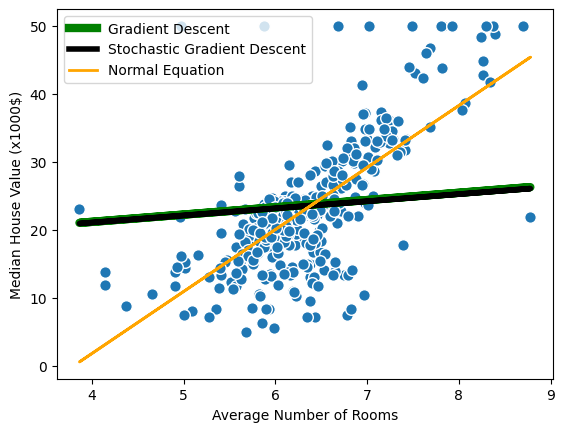

In [119]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_GD.predict(X_train), color='green', lw=6, label='Gradient Descent')
plt.plot(X_train, reg_SGD.predict(X_train), color='black', lw=4, label='Stochastic Gradient Descent')
plt.plot(X_train, reg_NE.predict(X_train), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Algorithms Comparisons

Weight Comparisions

In [120]:
w_GD = reg_GD.w
w_SGD = reg_SGD.w
# w_NE = reg_NE.w ### ???
w_NE = np.concatenate((np.array([reg_NE.intercept_]),reg_NE.coef_), axis = 0)
print(w_GD)
print(w_SGD)
print(w_NE)

[16.901331    1.06788682]
[16.89316342  1.04496751]
[-34.66230744   9.1181022 ]


Performance Comparisons (on Testing Set)

In [121]:
y_pred_GD = reg_GD.predict(X_test)

In [122]:
y_pred_SGD = reg_SGD.predict(X_test)

In [123]:
y_pred_NE = reg_NE.predict(X_test)

In [124]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

In [125]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 6.385956
MAE of SGD: 6.328549
MAE of NE: 4.314224


In [126]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 71.257286
MSE of SGD: 70.803493
MSE of NE: 40.35145


In [127]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.043694
R2 of SGD: 0.049785
R2 of NE: 0.458465


## Experiment with Standardized Data

In [128]:
# Re-load the dataset
housing_dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/boston_housing.csv")

In [129]:
# load the package for standardizing data (Standard Scaler)
from sklearn.preprocessing import StandardScaler

In [130]:
# Standardize the 'RM' column
scaler = StandardScaler()
housing_dataset[['RM']] = scaler.fit_transform(housing_dataset[['RM']])

In [131]:
# X_new <- 'RM' column, y <- 'MEDV' column
X_new = housing_dataset.loc[:, ['RM']].to_numpy()
y = housing_dataset.loc[:, 'MEDV'].to_numpy()

In [132]:
# Train-test spliting (7:3, random state = 42)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_new, y, test_size= 0.3, random_state = 42)

### Gradient Descent

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [23.01581921  6.40020122]
"LEARNING RATE" is:  0.001
learning at epoch = 0, i =  0


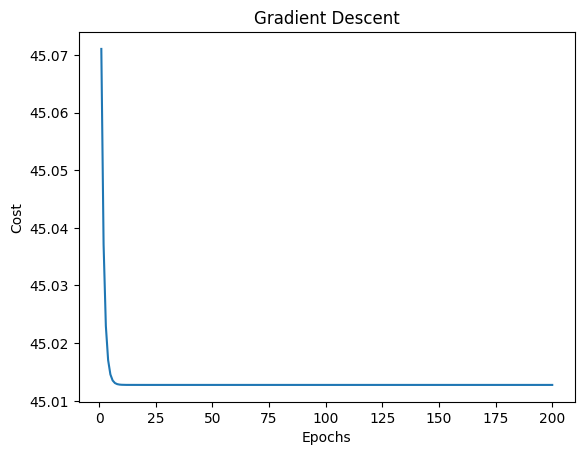

In [133]:
# Initalize the Gradient Descent model with: learning rate = 1e-3, max_iter = 200, random_state = 42
reg_GD = LinearRegressionScratch(n_features= X_train_norm.shape[1], random_state= 42,
                                 learning_rate= 1e-3, n_epochs= 200, batch_size= -1, pow_strength= 0)

# Train model on standardized data
reg_GD.fit(X_train_norm, y_train)


# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

Visualize the prediction of Gradient Descent model on Training Data



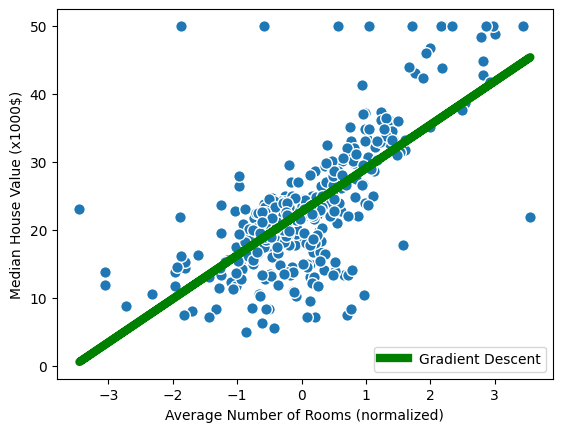

In [134]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_GD.predict(X_train_norm), color='green', lw=6, label='Gradient Descent')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Stochastic Gradient Descent

In [135]:
# Initalize the Stochastic Gradient Descent model with: eta0 = 1e-3, max_iter = 200, random_state=42, learning_rate = 'constant'
reg_SGD = LinearRegressionScratch(n_features= X_train_norm.shape[1], random_state= 42,
                                 learning_rate= 1e-3, n_epochs= 200, batch_size= 1, pow_strength= 0)

# Train SGD model on standardized data
reg_SGD.fit(X_train_norm, y_train)

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [23.01581921  6.40020122]
"LEARNING RATE" is:  0.001
learning at epoch = 0, i =  0
learning at epoch = 0, i =  1
learning at epoch = 0, i =  2
learning at epoch = 0, i =  3
learning at epoch = 0, i =  351
learning at epoch = 0, i =  352
learning at epoch = 0, i =  353


Visualize the prediction of Stochastic Gradient Descent model on Training Data


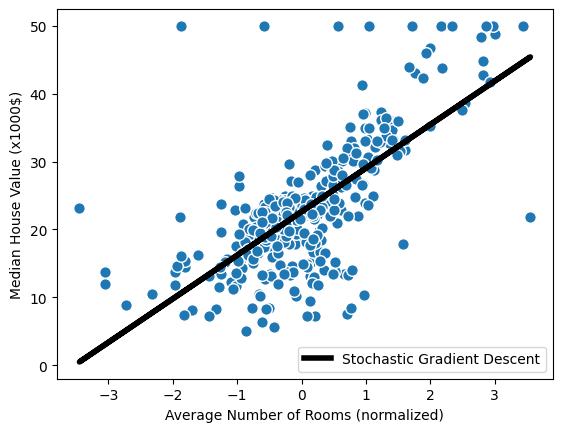

In [136]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_SGD.predict(X_train_norm), color='black', lw=4, label='Stochastic Gradient Descent')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

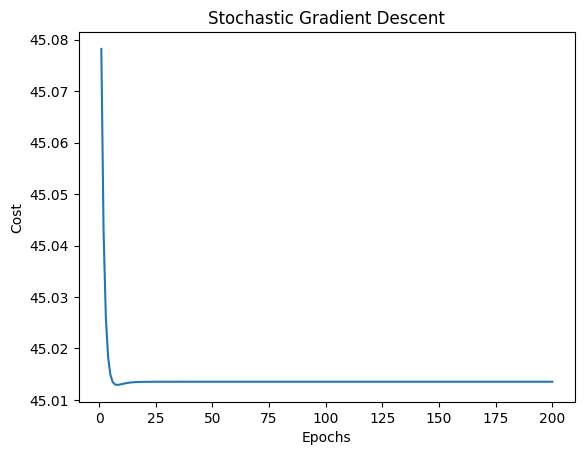

In [137]:
# Visualize the cost trend ### ***
plt.plot(range(1, len(reg_SGD.costs) + 1), reg_SGD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Stochastic Gradient Descent')
plt.show()

- Lí giải:
  - Nguyên nhân mà **cost tăng ngược trở lại** là do với ***SGD*** ta *cập nhật theo từng điểm dữ liệu một* (trong khi ***cost*** **ở đây là chi phí của toàn bộ điểm dữ liệu sau khi hoàn tất một epoch**).
  - Điều này không quá ảnh hưởng, do ta có thể loại bỏ điều này bằng chi tiết cài đặt sau:

In [138]:
# pick param that have min cost
# self.w = self.inlearn_params[np.argmin(self.costs)]

### Normal Equation (sklearn)

In [139]:
# Initalize the Normal Equation model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train_norm, y_train)

LinearRegression()

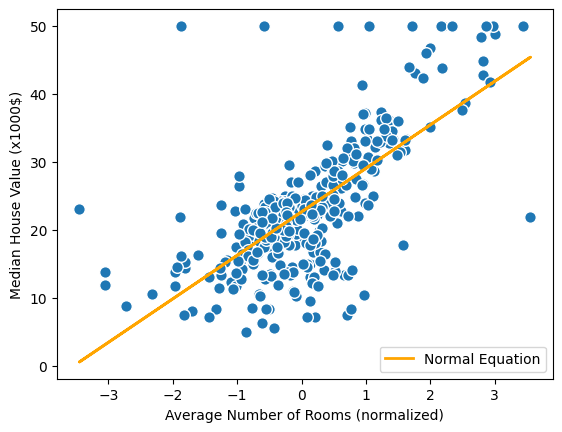

In [140]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_NE.predict(X_train_norm), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Visualize all models on Training Data

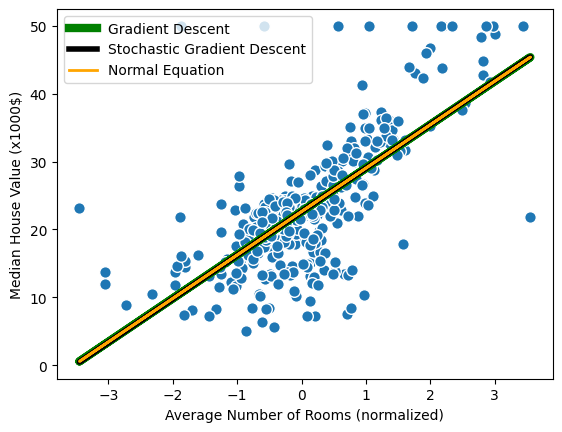

In [141]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_NE.predict(X_train_norm), color='green', lw=6, label='Gradient Descent')
plt.plot(X_train_norm, reg_SGD.predict(X_train_norm), color='black', lw=4, label='Stochastic Gradient Descent')
plt.plot(X_train_norm, reg_GD.predict(X_train_norm), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Algorithms Comparisons

In [142]:
w_GD = reg_GD.w
w_GD

array([22.64163118,  6.40020122])

In [143]:
w_SGD = reg_SGD.w
w_SGD

array([22.6184944 ,  6.41615383])

In [144]:
# w_NE = reg_NE.w ### ***
w_NE = np.concatenate((np.array([reg_NE.intercept_]),reg_NE.coef_), axis = 0)
w_NE

array([22.64163118,  6.40020122])

In [145]:
y_pred_GD = reg_GD.predict(X_test_norm)

In [146]:
y_pred_SGD = reg_SGD.predict(X_test_norm)

In [147]:
y_pred_NE = reg_NE.predict(X_test_norm)

In [148]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 4.314224
MAE of SGD: 4.311684
MAE of NE: 4.314224


In [149]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 40.35145
MSE of SGD: 40.336739
MSE of NE: 40.35145


In [150]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.458465
R2 of SGD: 0.458662
R2 of NE: 0.458465


# Multiple Linear Regression (n independent variable (n >=2) + 1 target variable)

## Experiment with normal data

In [151]:
# Re-load dataset
housing_dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/boston_housing.csv")

In [152]:
housing_dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


* X: 13 remaining variables (except 'MEDV' variable)
* y: 'MEDV' variable

In [153]:
X = housing_dataset.iloc[:, :-1].to_numpy()
y = housing_dataset.iloc[:, -1].to_numpy()

In [154]:
# Train-test set spliting with ratio 7:3, random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Gradient Descent

In [155]:
### ***
print(X_train.shape)
print(y_test.shape)

(354, 13)
(152,)


- Experiment with:
-- max_iter = 200
-- random_state = 42
-- learning_rate (eta) = {1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8}
- What is the suitable learning rate value?

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [2.30158192e+01 1.20190271e-06 0.00000000e+00 5.00296668e-05
 0.00000000e+00 3.18023945e-04 2.81108806e-04 1.94029505e-05
 1.38075089e-04 4.87734211e-05 2.11474700e-04 3.17321217e-04
 4.09509320e-07 6.41123109e-05]
"LEARNING RATE" is:  0.001
learning at epoch = 0, i =  0


<ipython-input-108-d34c4249f88d>:106: RuntimeWarning: divide by zero encountered in double_scalars
  self.w[i] = (np.mean(y)/np.mean(x)) / (np.max(y)/np.min(x)) * self.learning_rate
<ipython-input-108-d34c4249f88d>:94: RuntimeWarning: overflow encountered in square
  return np.mean((y_pred - y)**2)
<ipython-input-108-d34c4249f88d>:78: RuntimeWarning: overflow encountered in multiply
  return k * np.mean(X * (y_pred - y).reshape((-1, 1)), axis = 0)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
<ipython-input-108-d34c4249f88d>:63: RuntimeWarning: invalid value encountered in multiply
  return np.sum(X * self.w, axis = 1)


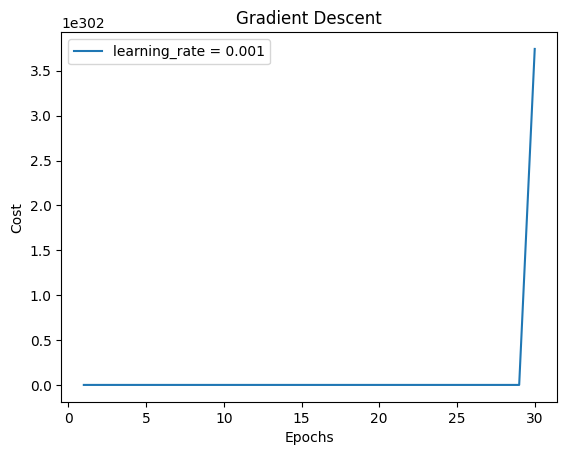

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [2.30158192e+01 1.20190271e-07 0.00000000e+00 5.00296668e-06
 0.00000000e+00 3.18023945e-05 2.81108806e-05 1.94029505e-06
 1.38075089e-05 4.87734211e-06 2.11474700e-05 3.17321217e-05
 4.09509320e-08 6.41123109e-06]
"LEARNING RATE" is:  0.0001
learning at epoch = 0, i =  0


<ipython-input-108-d34c4249f88d>:78: RuntimeWarning: invalid value encountered in multiply
  return k * np.mean(X * (y_pred - y).reshape((-1, 1)), axis = 0)
<ipython-input-108-d34c4249f88d>:149: RuntimeWarning: invalid value encountered in subtract
  self.w -= self.learning_rate * velocity


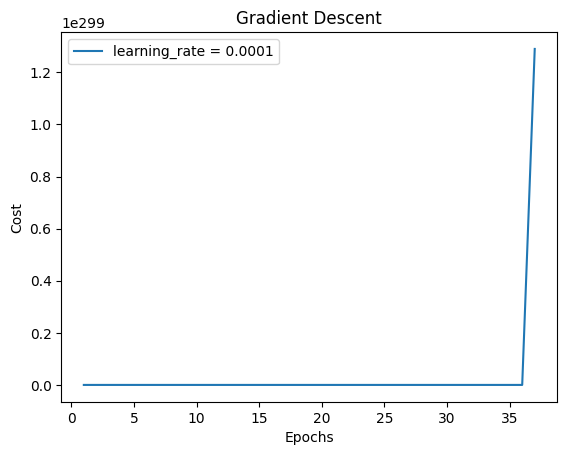

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [2.30158192e+01 1.20190271e-08 0.00000000e+00 5.00296668e-07
 0.00000000e+00 3.18023945e-06 2.81108806e-06 1.94029505e-07
 1.38075089e-06 4.87734211e-07 2.11474700e-06 3.17321217e-06
 4.09509320e-09 6.41123109e-07]
"LEARNING RATE" is:  1e-05
learning at epoch = 0, i =  0


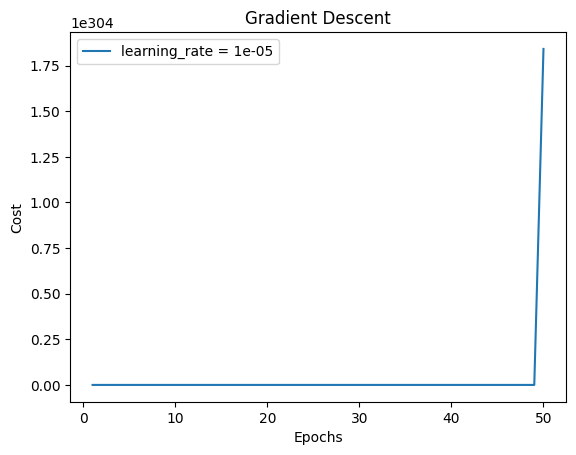

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [2.30158192e+01 1.20190271e-09 0.00000000e+00 5.00296668e-08
 0.00000000e+00 3.18023945e-07 2.81108806e-07 1.94029505e-08
 1.38075089e-07 4.87734211e-08 2.11474700e-07 3.17321217e-07
 4.09509320e-10 6.41123109e-08]
"LEARNING RATE" is:  1e-06
learning at epoch = 0, i =  0


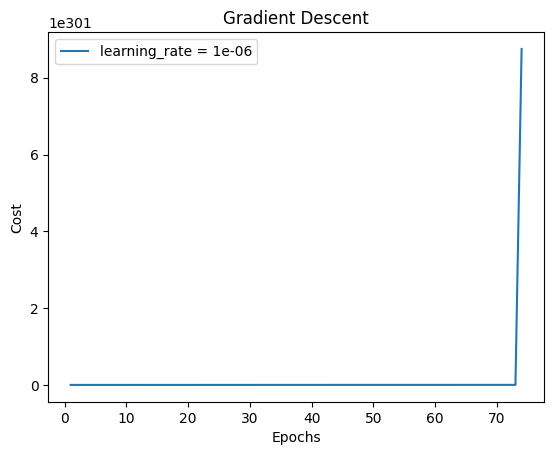

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [2.30158192e+01 1.20190271e-10 0.00000000e+00 5.00296668e-09
 0.00000000e+00 3.18023945e-08 2.81108806e-08 1.94029505e-09
 1.38075089e-08 4.87734211e-09 2.11474700e-08 3.17321217e-08
 4.09509320e-11 6.41123109e-09]
"LEARNING RATE" is:  1e-07
learning at epoch = 0, i =  0


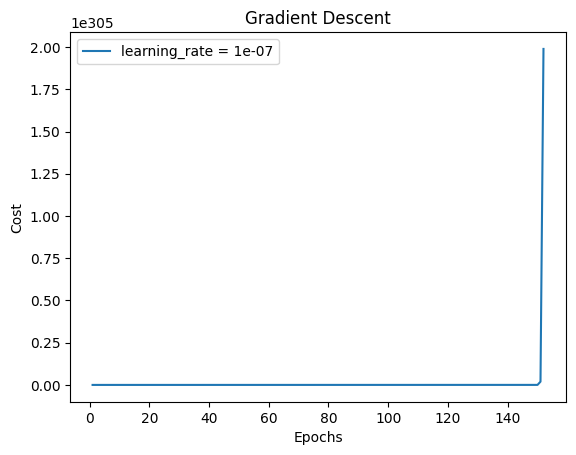

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [2.30158192e+01 1.20190271e-11 0.00000000e+00 5.00296668e-10
 0.00000000e+00 3.18023945e-09 2.81108806e-09 1.94029505e-10
 1.38075089e-09 4.87734211e-10 2.11474700e-09 3.17321217e-09
 4.09509320e-12 6.41123109e-10]
"LEARNING RATE" is:  1e-08
learning at epoch = 0, i =  0


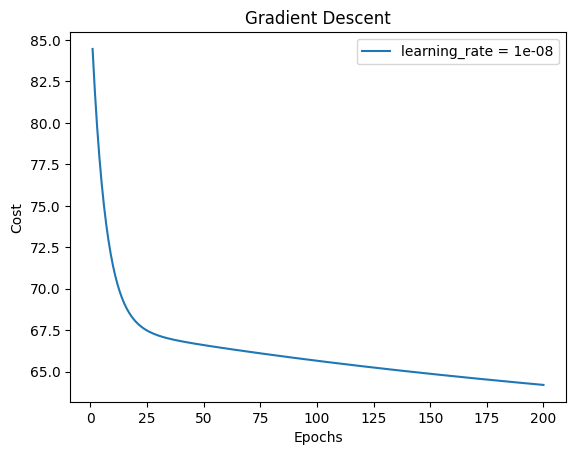

In [156]:
for learning_rate in [1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8]:
  # Initalize the GD model
  reg_GD = LinearRegressionScratch(n_features = X_train.shape[1], random_state= 42,
                                  learning_rate = learning_rate, n_epochs = 200, batch_size = -1, pow_strength = 0)

  # Train model
  reg_GD.fit(X_train, y_train)

  # Visualize the cost trend
  plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs, label = f'learning_rate = {learning_rate}')
  plt.xlabel('Epochs')
  plt.ylabel('Cost')
  plt.title('Gradient Descent')
  plt.legend()
  plt.show()

- Respond:
  - The suitable learning_rate is ***1e-8***

<ipython-input-108-d34c4249f88d>:106: RuntimeWarning: divide by zero encountered in double_scalars
  self.w[i] = (np.mean(y)/np.mean(x)) / (np.max(y)/np.min(x)) * self.learning_rate


---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [2.30158192e+01 1.20190271e-11 0.00000000e+00 5.00296668e-10
 0.00000000e+00 3.18023945e-09 2.81108806e-09 1.94029505e-10
 1.38075089e-09 4.87734211e-10 2.11474700e-09 3.17321217e-09
 4.09509320e-12 6.41123109e-10]
"LEARNING RATE" is:  1e-08
learning at epoch = 0, i =  0


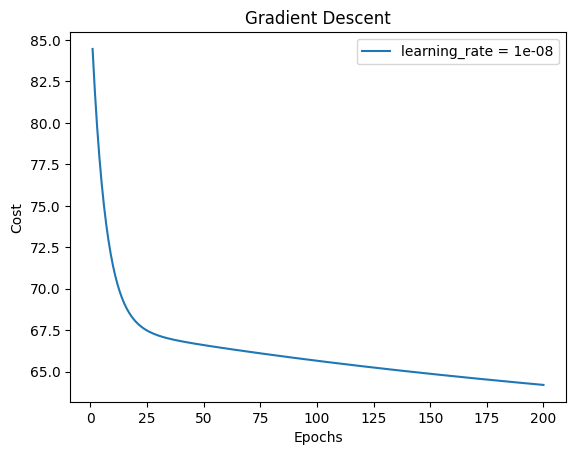

In [157]:
# Initalize the GD model
reg_GD = LinearRegressionScratch(n_features = X_train.shape[1], random_state= 42,
                                learning_rate = 1e-8, n_epochs = 200, batch_size = -1, pow_strength = 0)

# Train model
reg_GD.fit(X_train, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs, label = f'learning_rate = {1e-8}')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.legend()
plt.show()

### Stochastic Gradient Descent

In [158]:
# Initialize the SGD model
reg_SGD = LinearRegressionScratch(n_features = X_train.shape[1], random_state= 42,
                                learning_rate = 1e-8, n_epochs = 200, batch_size = 1, pow_strength = 0)

# Train model
reg_SGD.fit(X_train, y_train)

<ipython-input-108-d34c4249f88d>:106: RuntimeWarning: divide by zero encountered in double_scalars
  self.w[i] = (np.mean(y)/np.mean(x)) / (np.max(y)/np.min(x)) * self.learning_rate


---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [2.30158192e+01 1.20190271e-11 0.00000000e+00 5.00296668e-10
 0.00000000e+00 3.18023945e-09 2.81108806e-09 1.94029505e-10
 1.38075089e-09 4.87734211e-10 2.11474700e-09 3.17321217e-09
 4.09509320e-12 6.41123109e-10]
"LEARNING RATE" is:  1e-08
learning at epoch = 0, i =  0
learning at epoch = 0, i =  1
learning at epoch = 0, i =  2
learning at epoch = 0, i =  3
learning at epoch = 0, i =  351
learning at epoch = 0, i =  352
learning at epoch = 0, i =  353


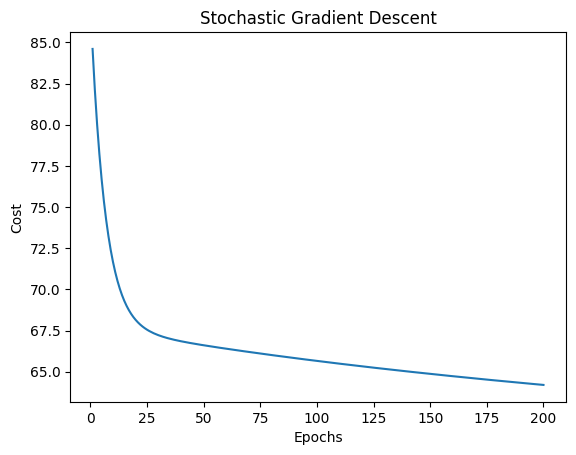

In [159]:
# Visualize the cost trend ### ***
plt.plot(range(1, len(reg_SGD.costs) + 1), reg_SGD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Stochastic Gradient Descent')
plt.show()

### Normal Equation

In [160]:
# Add the '1' column to data
### ???

In [161]:
# Intialize the NE model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train, y_train)

LinearRegression()

### Algorithms Comparisons

In [162]:
w_GD = reg_GD.w
w_GD

array([ 2.30158915e+01, -6.53949779e-03,  2.35344355e-02, -5.67999511e-03,
        3.83898726e-04, -3.68487884e-05,  3.14126656e-03, -1.47955379e-02,
        4.18633731e-05,  4.52536490e-04, -1.68905941e-02, -3.10364780e-03,
        2.20985072e-02, -2.21181639e-02])

In [163]:
w_SGD = reg_SGD.w
w_SGD

array([ 2.30158916e+01, -6.53715458e-03,  2.35248402e-02, -5.68236466e-03,
        3.85982289e-04, -3.68532800e-05,  3.14435233e-03, -1.48565289e-02,
        4.02488497e-05,  4.54489163e-04, -1.68922229e-02, -3.09953966e-03,
        2.19708210e-02, -2.21518717e-02])

In [164]:
# w_NE = reg_NE.w ### ???
w_NE = np.concatenate((np.array([reg_NE.intercept_]),reg_NE.coef_), axis = 0)
w_NE

array([ 3.16310840e+01, -1.33470103e-01,  3.58089136e-02,  4.95226452e-02,
        3.11983512e+00, -1.54170609e+01,  4.05719923e+00, -1.08208352e-02,
       -1.38599824e+00,  2.42727340e-01, -8.70223437e-03, -9.10685208e-01,
        1.17941159e-02, -5.47113313e-01])

In [165]:
y_pred_GD = reg_GD.predict(X_test)

In [166]:
y_pred_SGD = reg_SGD.predict(X_test)

In [167]:
y_pred_NE = reg_NE.predict(X_test)

In [168]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 5.454428
MAE of SGD: 5.429907
MAE of NE: 3.16271


In [169]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 52.484774
MSE of SGD: 52.334614
MSE of NE: 21.517444


In [170]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.29563
R2 of SGD: 0.297645
R2 of NE: 0.711226


## Experiment with Standardized Data

In [171]:
# Re-load dataset
housing_dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/boston_housing.csv")

In [172]:
# Get the columns' names
name_columns = housing_dataset.columns.values
name_columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], dtype=object)

In [173]:
# Initialize the standardize scaler
scaler = StandardScaler()

# Standardize all independent variables
housing_dataset[name_columns[:-1]] = scaler.fit_transform(housing_dataset[name_columns[:-1]])

X_new <- 13 independent variables

y <- 'MEDV' column

In [174]:
X_new = housing_dataset.iloc[:, :-1].to_numpy()
y = housing_dataset.iloc[:, -1].to_numpy()

In [175]:
# Split train-test set (7:3, random_state = 42)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state = 42)

In [176]:
print(X_train_norm.shape)
print(y_test.shape)
print(X_train_norm[0])
print(y_train[0])
print(X_test_norm[0])
print(y_test[0])

(354, 13)
(152,)
[-0.41704368 -0.48772236 -1.30687771 -0.27259857 -0.83528384  0.20709638
 -0.35115713  1.07773662 -0.75292215 -1.10611514  0.1130321   0.41057102
 -1.04332233]
28.7
[-0.40983668 -0.48772236 -1.03402724 -0.27259857 -0.38609067  0.18715116
  0.55208139 -0.54607682 -0.52300145 -0.66660821 -0.85792914  0.42570183
 -0.50645674]
23.6


### Gradient Descent

- Experiment with following learning rates = {1e-3, 1e-5, 1e-4}
- max_iter = 200
- random_state = 42

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [ 2.30158192e+01  1.15513216e-02 -1.29738854e-01  1.22577612e+00
 -7.44558747e-03 -3.04623293e-02 -2.71631150e-02 -1.34470807e-01
  4.20638538e-02  3.52782680e-02  8.52365948e-02  1.51795690e-02
 -5.41769218e-02  2.16789268e-02]
"LEARNING RATE" is:  0.001
learning at epoch = 0, i =  0


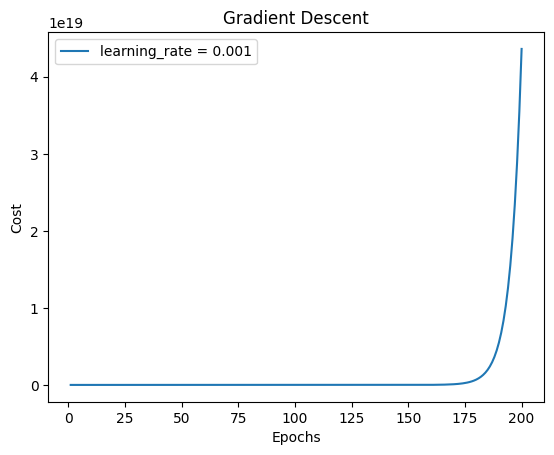

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [ 2.30158192e+01  1.15513216e-04 -1.29738854e-03  1.22577612e-02
 -7.44558747e-05 -3.04623293e-04 -2.71631150e-04 -1.34470807e-03
  4.20638538e-04  3.52782680e-04  8.52365948e-04  1.51795690e-04
 -5.41769218e-04  2.16789268e-04]
"LEARNING RATE" is:  1e-05
learning at epoch = 0, i =  0


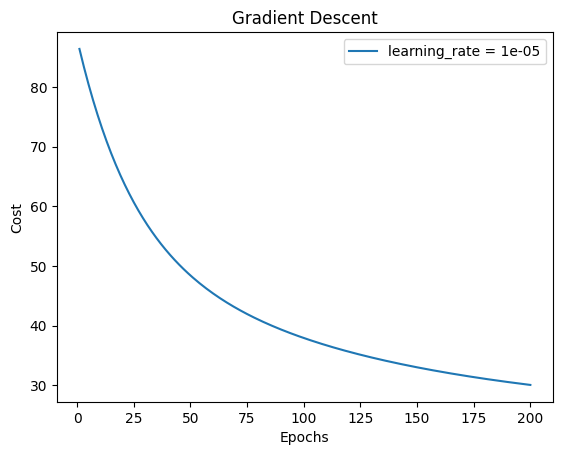

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [ 2.30158192e+01  1.15513216e-03 -1.29738854e-02  1.22577612e-01
 -7.44558747e-04 -3.04623293e-03 -2.71631150e-03 -1.34470807e-02
  4.20638538e-03  3.52782680e-03  8.52365948e-03  1.51795690e-03
 -5.41769218e-03  2.16789268e-03]
"LEARNING RATE" is:  0.0001
learning at epoch = 0, i =  0


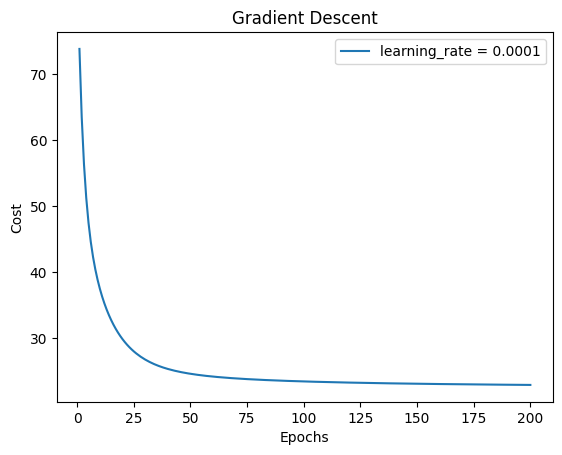

In [177]:
for learning_rate in [1e-3, 1e-5, 1e-4]:
  # Initalize the GD model
  reg_GD = LinearRegressionScratch(n_features = X_train_norm.shape[1], random_state= 42,
                                  learning_rate = learning_rate, n_epochs = 200, batch_size = -1, pow_strength = 0)

  # Train model on normalized data
  reg_GD.fit(X_train_norm, y_train)

  # Visualize the cost trend
  plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs, label = f'learning_rate = {learning_rate}')
  plt.xlabel('Epochs')
  plt.ylabel('Cost')
  plt.title('Gradient Descent')
  plt.legend()
  plt.show()

- Respond:
  - the suitable learning_rate is ***0.0001***, because it converges the best

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [ 2.30158192e+01  1.15513216e-03 -1.29738854e-02  1.22577612e-01
 -7.44558747e-04 -3.04623293e-03 -2.71631150e-03 -1.34470807e-02
  4.20638538e-03  3.52782680e-03  8.52365948e-03  1.51795690e-03
 -5.41769218e-03  2.16789268e-03]
"LEARNING RATE" is:  0.0001
learning at epoch = 0, i =  0


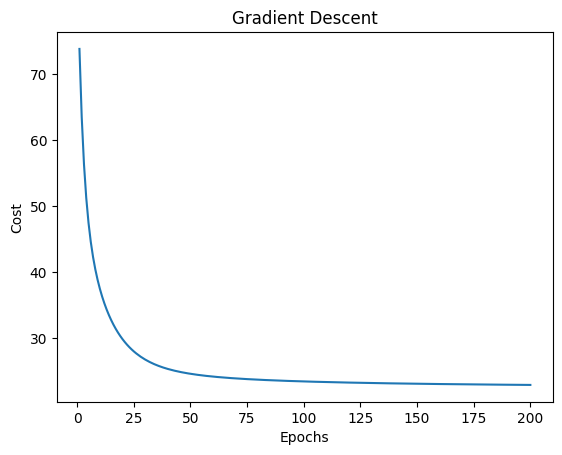

In [178]:
# Initalize the GD model
reg_GD = LinearRegressionScratch(n_features = X_train_norm.shape[1], random_state= 42,
                                learning_rate = 0.0001, n_epochs = 200, batch_size = -1, pow_strength = 0)

# Train model on normalized data
reg_GD.fit(X_train_norm, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

### Stochastic Gradient Descent

In [179]:
# Initialize SGD model (eta0=1e-4, max_iter=200, random_state=42, learning_rate='constant')
reg_SGD = LinearRegressionScratch(n_features = X_train_norm.shape[1], random_state= 42,
                                learning_rate = 1e-4, n_epochs = 200, batch_size = 1, pow_strength = 0)

# Train model
reg_SGD.fit(X_train_norm, y_train)

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [ 2.30158192e+01  1.15513216e-03 -1.29738854e-02  1.22577612e-01
 -7.44558747e-04 -3.04623293e-03 -2.71631150e-03 -1.34470807e-02
  4.20638538e-03  3.52782680e-03  8.52365948e-03  1.51795690e-03
 -5.41769218e-03  2.16789268e-03]
"LEARNING RATE" is:  0.0001
learning at epoch = 0, i =  0
learning at epoch = 0, i =  1
learning at epoch = 0, i =  2
learning at epoch = 0, i =  3
learning at epoch = 0, i =  351
learning at epoch = 0, i =  352
learning at epoch = 0, i =  353


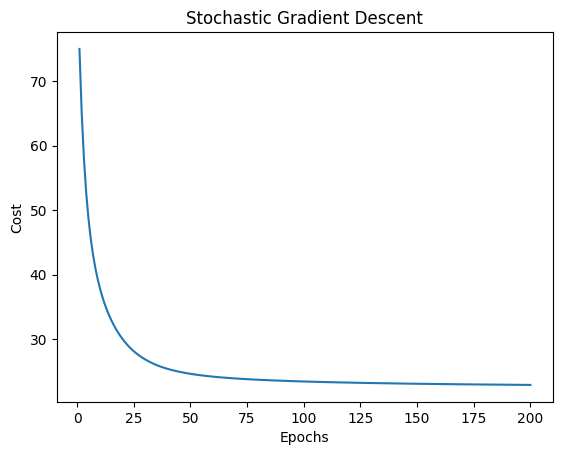

In [180]:
# Visualize the cost trend ### ***
plt.plot(range(1, len(reg_SGD.costs) + 1), reg_SGD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Stochastic Gradient Descent')
plt.show()

### Normal Equation (sklearn)

In [181]:
# Initialize NE model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train_norm, y_train)

LinearRegression()

### Algorithms Comparisons

In [182]:
w_GD = reg_GD.w
w_GD

array([22.50113843, -0.93783913,  0.45400016, -0.0447112 ,  0.8712266 ,
       -1.12421369,  3.07447487, -0.37322736, -2.27446708,  0.89231848,
       -0.38047334, -1.83199279,  1.0741772 , -3.8063829 ])

In [183]:
# w_SGD = np.append(reg_SGD.intercept_, reg_SGD.coef_) ### ???
w_SGD = reg_SGD.w
w_SGD

array([22.49970125, -0.93505728,  0.45313692, -0.04373223,  0.87617924,
       -1.12342828,  3.07461293, -0.37237353, -2.27523314,  0.89512955,
       -0.37840936, -1.8301926 ,  1.07272308, -3.80474129])

In [184]:
w_NE = np.append(reg_NE.intercept_, reg_NE.coef_)
w_NE

array([22.50945471, -1.14691411,  0.83432605,  0.33940694,  0.79163612,
       -1.784727  ,  2.84783949, -0.30429306, -2.91562521,  2.11140045,
       -1.46519951, -1.9696347 ,  1.07567771, -3.90310727])

In [185]:
y_pred_GD = reg_GD.predict(X_test_norm)

In [186]:
y_pred_SGD = reg_SGD.predict(X_test_norm)

In [187]:
y_pred_NE = reg_NE.predict(X_test_norm)

In [188]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 3.202511
MAE of SGD: 3.200691
MAE of NE: 3.16271


In [189]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 22.788338
MSE of SGD: 22.777074
MSE of NE: 21.517444


In [190]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.69417
R2 of SGD: 0.694321
R2 of NE: 0.711226


# **Conclude:**

In [191]:
table = pd.DataFrame({'no_norm_simple': [], 'norm_simple': [], 'no_norm_multiple': [], 'norm_multiple': []})
table.loc[len(table)] = [[0.010847, 0.120294, 0.458465], [0.455182, 0.4588, 0.458465], [0.276853, 0.554056, 0.711226], [0.560917, 0.703398, 0.711226]]

In [192]:
table.loc[len(table)] = [
    [0.043694,
    0.049785,
    0.458465],
    [0.458465,
    0.458662,
    0.458465],
    [0.29563,
    0.297645,
    0.711226],
    [0.69417,
    0.694321,
    0.711226]
]


In [194]:
print(table)

                   no_norm_simple                     norm_simple  \
0  [0.010847, 0.120294, 0.458465]    [0.455182, 0.4588, 0.458465]   
1  [0.043694, 0.049785, 0.458465]  [0.458465, 0.458662, 0.458465]   

                 no_norm_multiple                   norm_multiple  
0  [0.276853, 0.554056, 0.711226]  [0.560917, 0.703398, 0.711226]  
1   [0.29563, 0.297645, 0.711226]   [0.69417, 0.694321, 0.711226]  


- Nhìn chung thì việc **có sử dụng trung bình hay không sử dụng trung bình** theo 2 cách cài đặt trên đều cho kết quả khá tốt và không quá khác biệt nhau nhiều giữa 2 cách cài đặt (trong một số trường hợp sẽ có cách cài đặt chưa hoàn toàn hội tụ).
- Với cách cài đặt không sử dụng trung bình, vector gradient sẽ gấp khoảng batch_size (số lượng điểm dữ liệu trong một batch ~ 100) lần so với vector gradient của cách cài đặt kia, hệ quả là ***learnin_rate*** **được chọn của phiên bản Version 2 sẽ thường nhỏ hơn 100 lần so với phiên bản đầu tiên**.
- Tuy nhiên, theo kinh nghiệm cá nhân, chúng ta vẫn **nên tuân thủ cách cài đặt có lấy trung bình sẽ tốt hơn**. Do với tập dữ liệu có số lượng điểm dữ liệu lớn (khoảng 1e4 - 1e5) thì khi đó nếu không lấy trung bình thì vector gradient này sẽ rất lớn (tỉ lệ với số lượng điểm dữ liệu), cũng như learning_rate được chọn phải rất nhỏ, gây ra những sai sót *tràn số trong tính toán* không đáng có.